In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Data preparation and Cleaning

In [2]:
main_df = dict()
for year in range(2015, 2023) :
    main_df[str(year)] = pd.read_csv("clnd_v1_" + str(year) + '.csv')
    main_df[str(year)].columns = main_df[str(year)].columns.str.lower().str.replace(' ', '_')
    main_df[str(year)]['year'] = str(year)
    print(year, len(main_df[str(year)]))
    if year != 2015:
        main_df[str(year)].drop('regional_indicator', axis = 1, inplace = True)
        main_df[str(year)] = main_df[str(year)].merge(main_df['2015'][['country', 'regional_indicator']], how = 'inner', on ='country')
          

2015 158
2016 157
2017 152
2018 153
2019 154
2020 153
2021 149
2022 142


In [51]:
for year in main_df:
    if year == '2015':
        combined_df = main_df[year]
    combined_df = combined_df.append(main_df[year], ignore_index=True)

In [52]:
combined_df.head()

,rank,country,regional_indicator,happiness_score,dystopia_+_residual,explained_by:_gdp_per_capita,explained_by:_social_support,explained_by:_healthy_life_expectancy,explained_by:_freedom_to_make_life_choices,explained_by:_generosity,explained_by:_perceptions_of_corruption,year,dystopia_score,whisker-high,whisker-low
0,1,Switzerland,Western Europe,7.587,2.51738,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,NaN,NaN,NaN
1,2,Iceland,Western Europe,7.561,2.70201,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,NaN,NaN,NaN
2,3,Denmark,Western Europe,7.527,2.49204,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,NaN,NaN,NaN
3,4,Norway,Western Europe,7.522,2.46531,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,NaN,NaN,NaN
4,5,Canada,North America,7.427,2.45176,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,NaN,NaN,NaN


In [3]:
main_df['2015'].head()

,rank,country,regional_indicator,happiness_score,dystopia_+_residual,explained_by:_gdp_per_capita,explained_by:_social_support,explained_by:_healthy_life_expectancy,explained_by:_freedom_to_make_life_choices,explained_by:_generosity,explained_by:_perceptions_of_corruption,year
0,1,Switzerland,Western Europe,7.587,2.51738,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,2,Iceland,Western Europe,7.561,2.70201,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,3,Denmark,Western Europe,7.527,2.49204,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,4,Norway,Western Europe,7.522,2.46531,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,5,Canada,North America,7.427,2.45176,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [4]:
def renameCol(dfDict, colList, name) :
    for year in dfDict:
        for col in colList:
            if col in dfDict[year].columns:
                dfDict[year].rename(columns = {col:name}, inplace = True)
                

## Exploratory Data Analysis 

### By region over the years

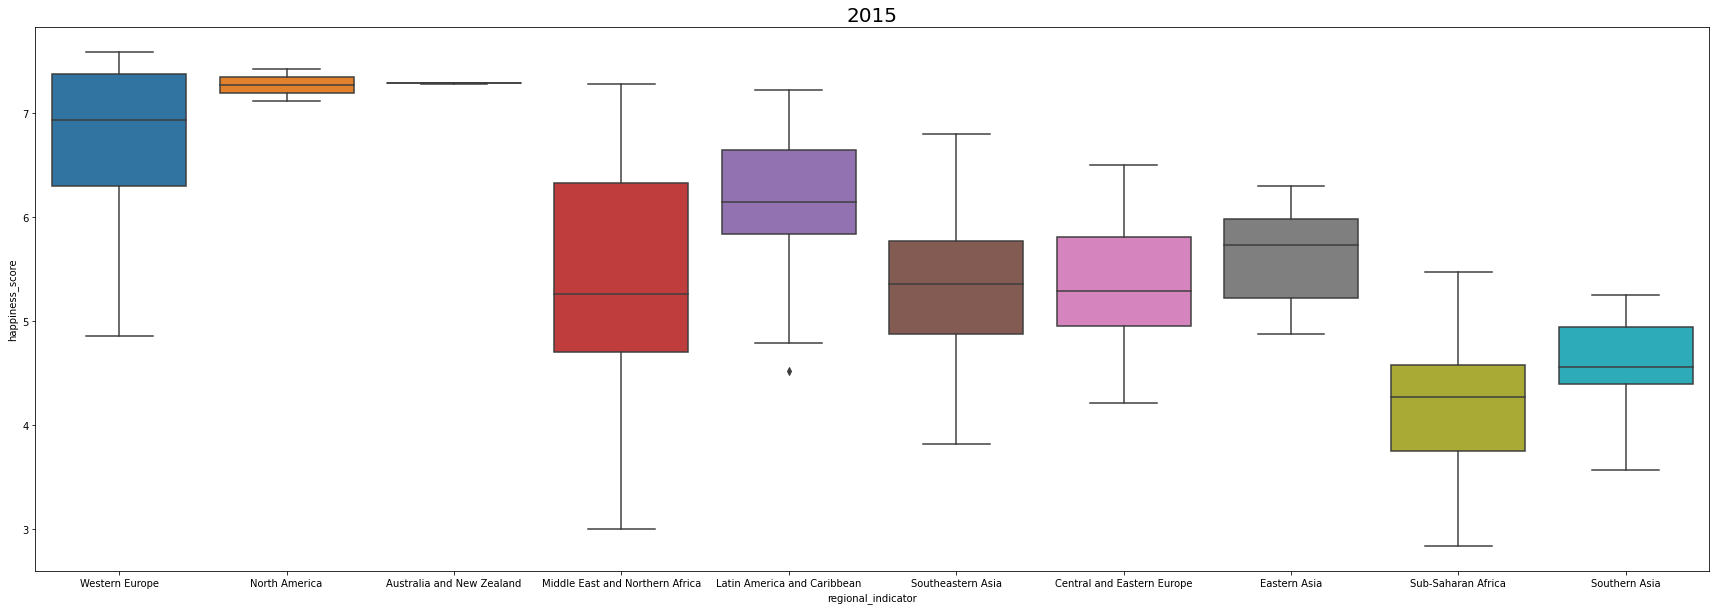

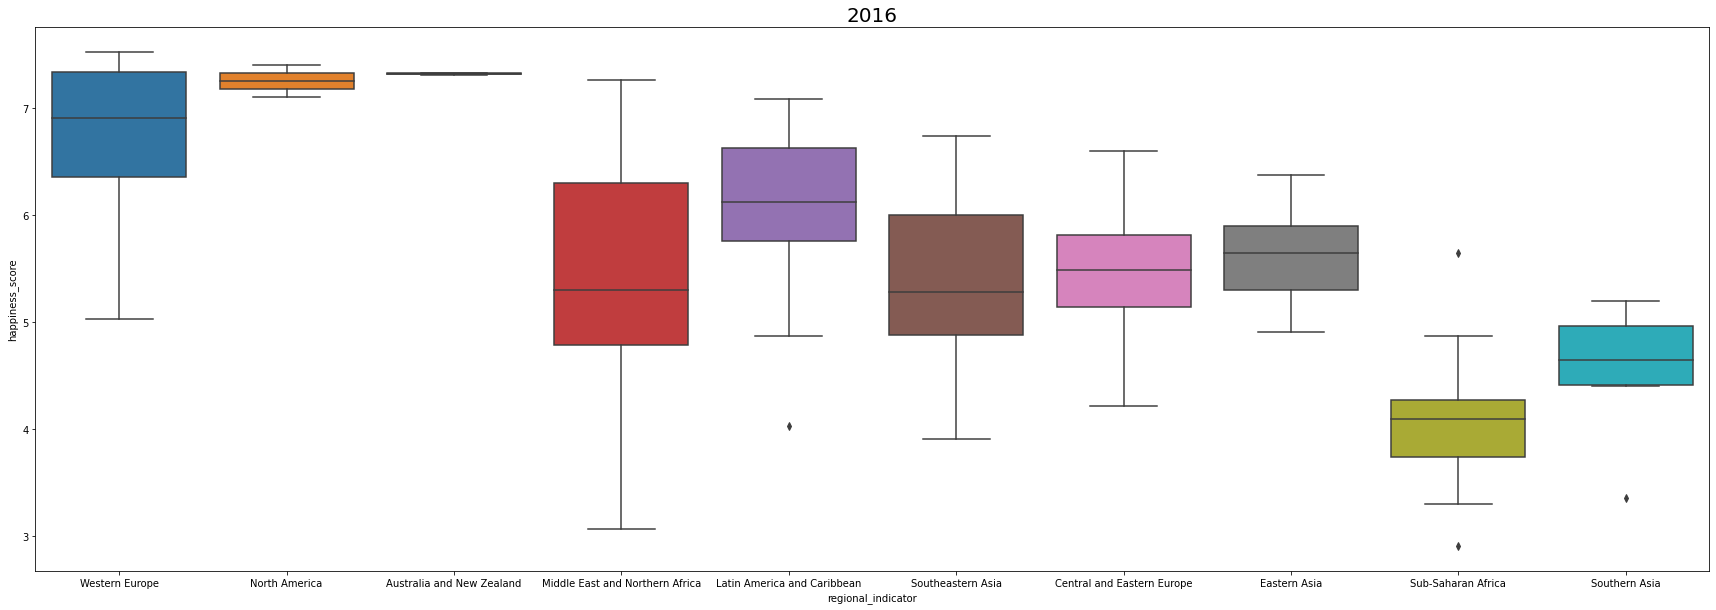

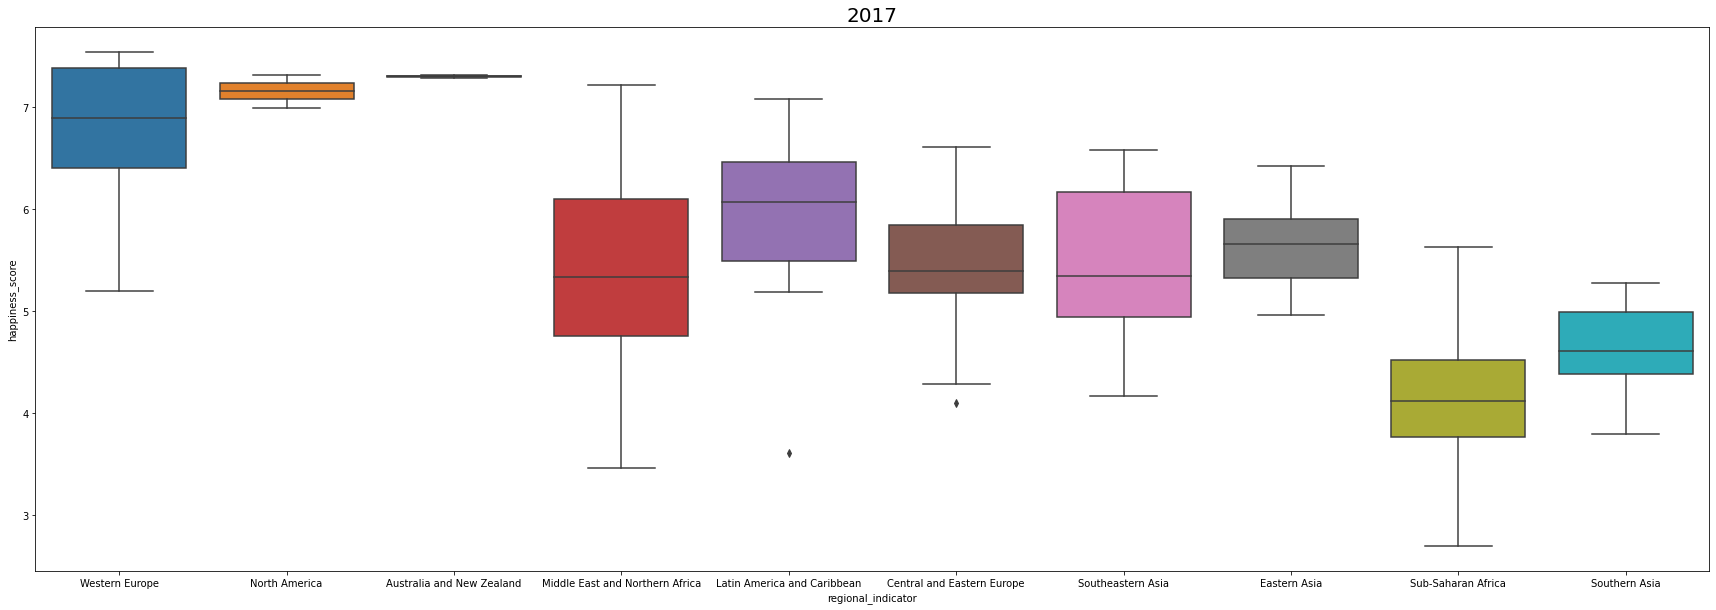

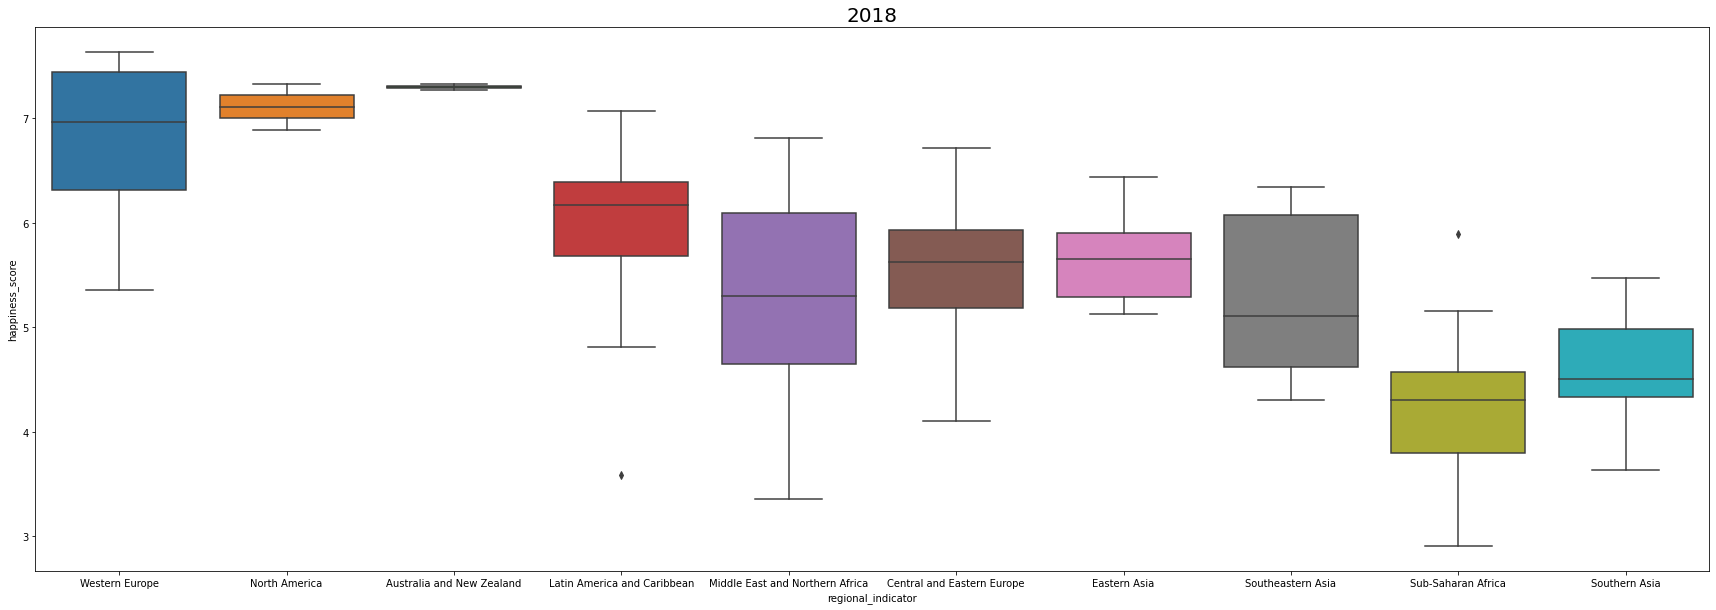

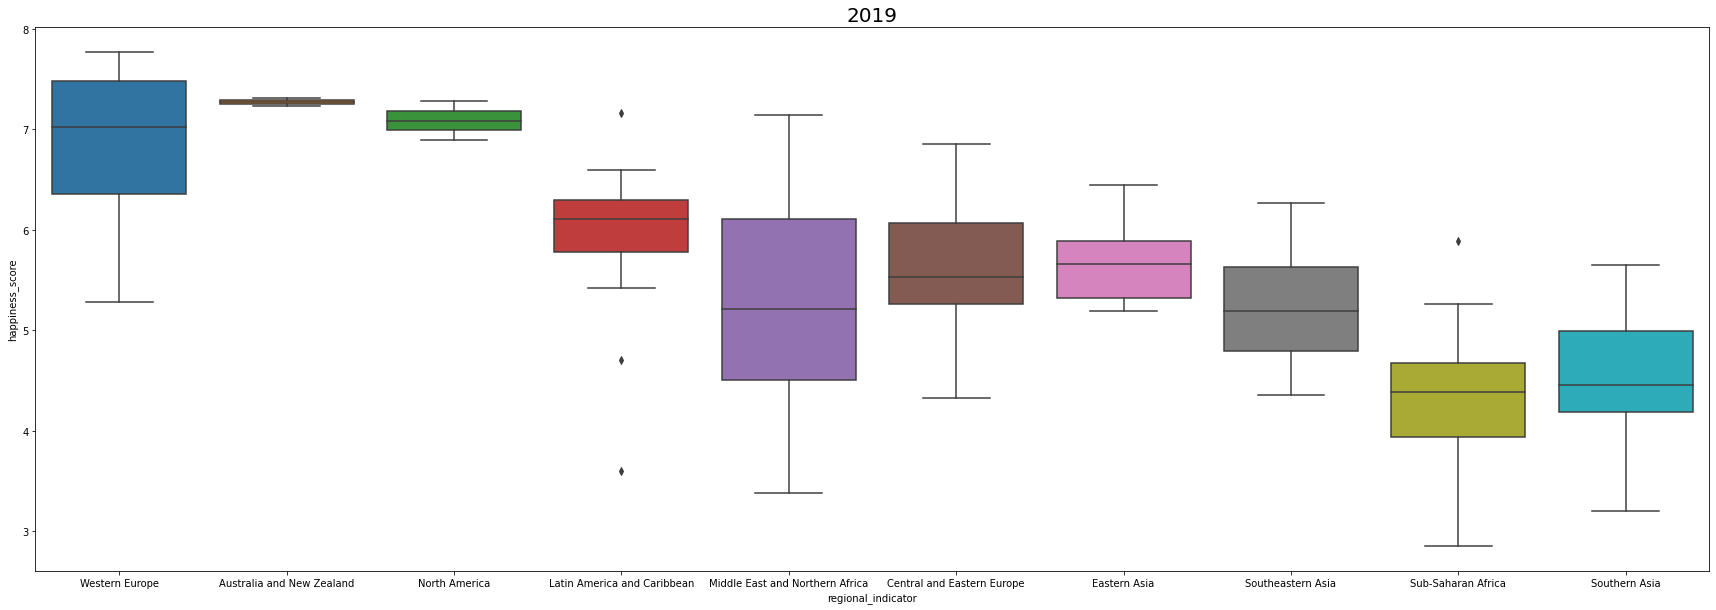

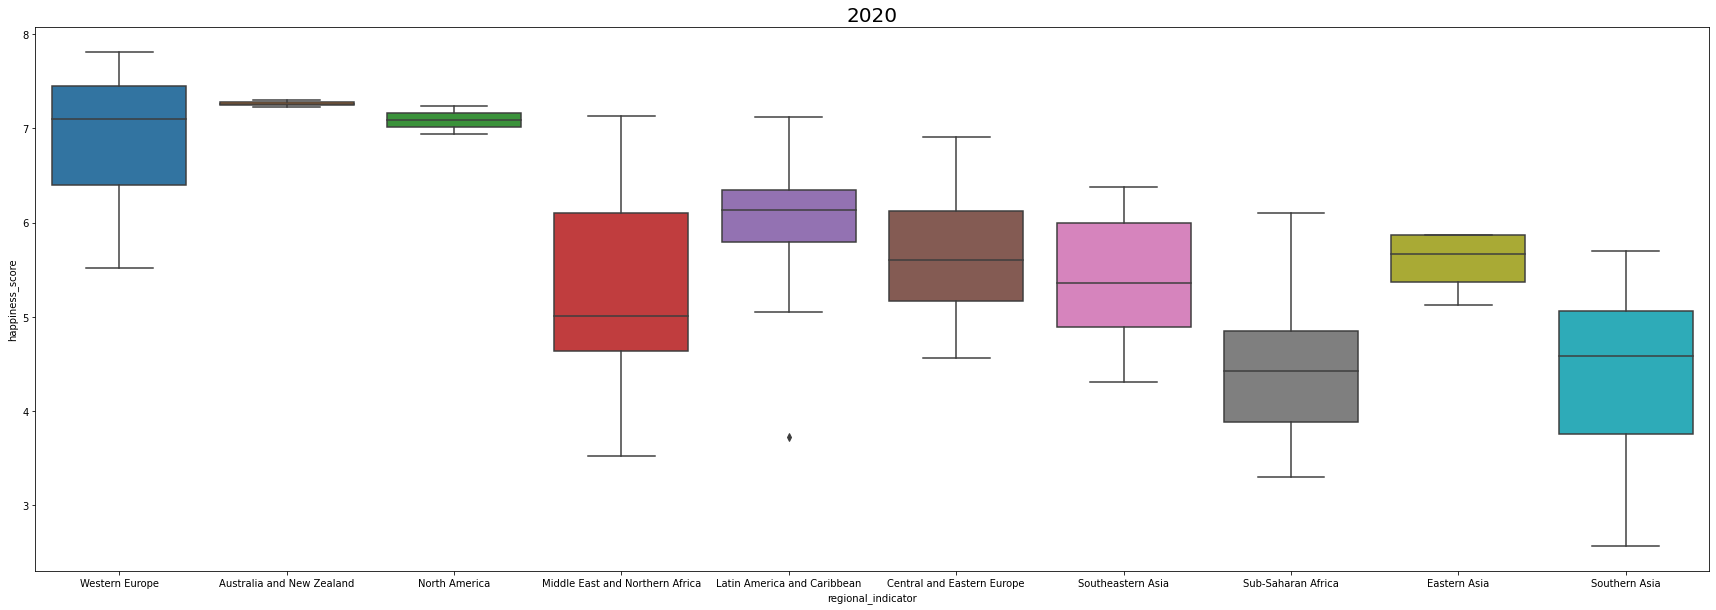

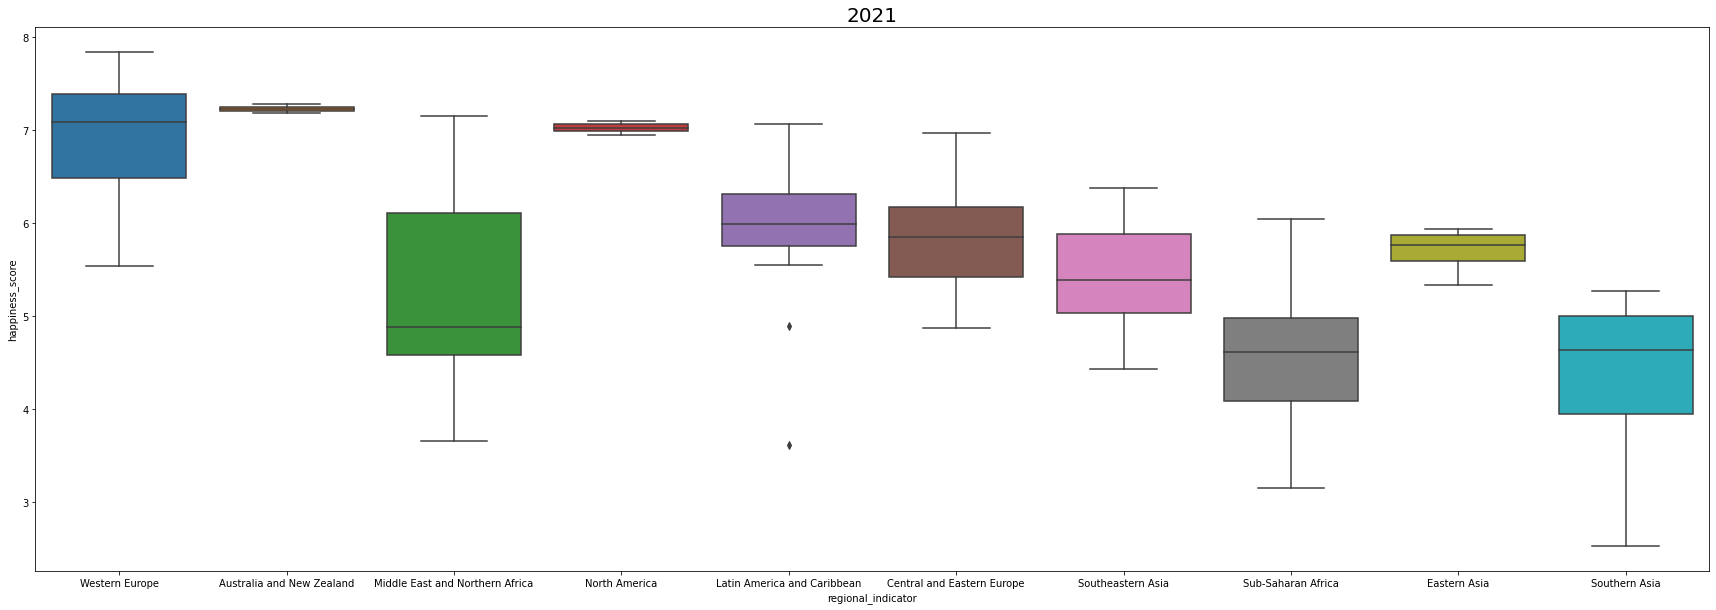

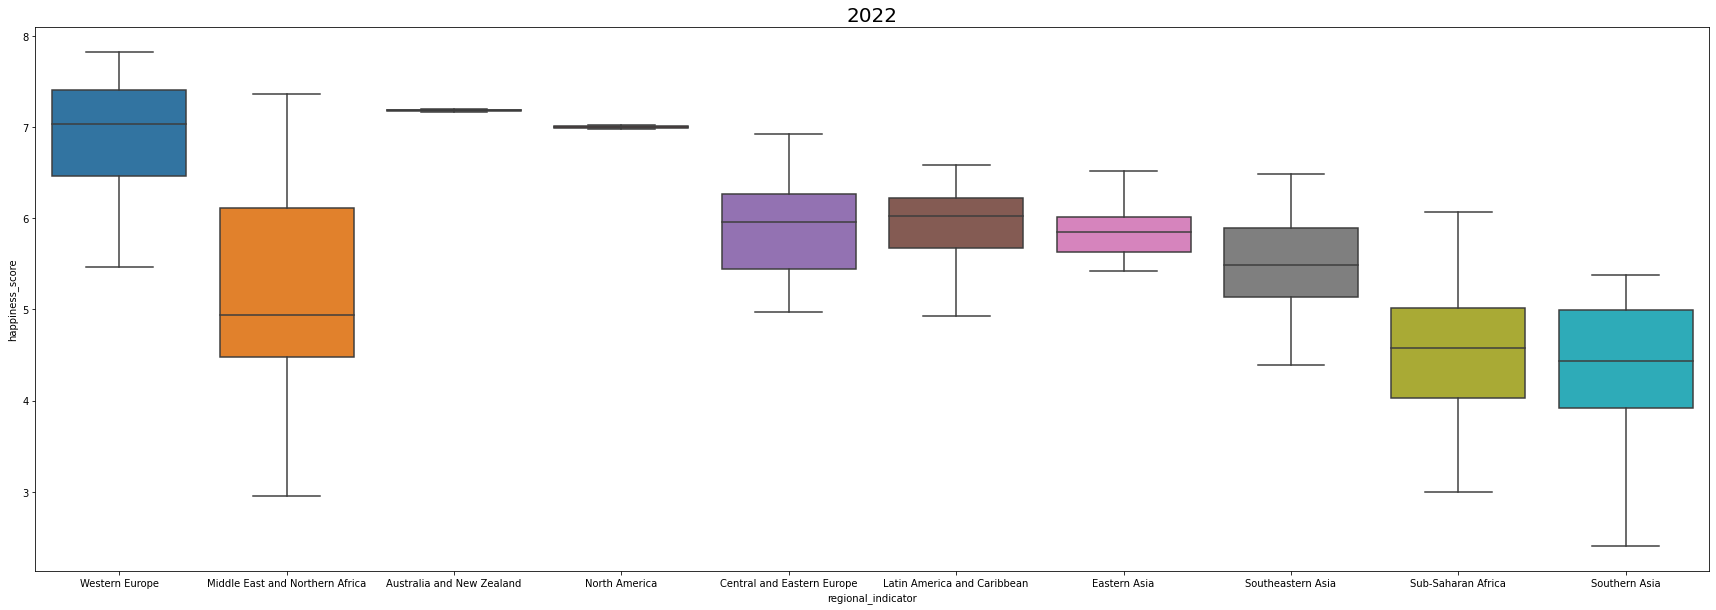

In [64]:
for year in main_df:
    f = plt.figure(figsize=(30, 10))
    sb.boxplot(x = 'regional_indicator', y = 'happiness_score', data = main_df[year])
    plt.title(year, fontsize = 20)

### By year     

<AxesSubplot:xlabel='year', ylabel='happiness_score'>

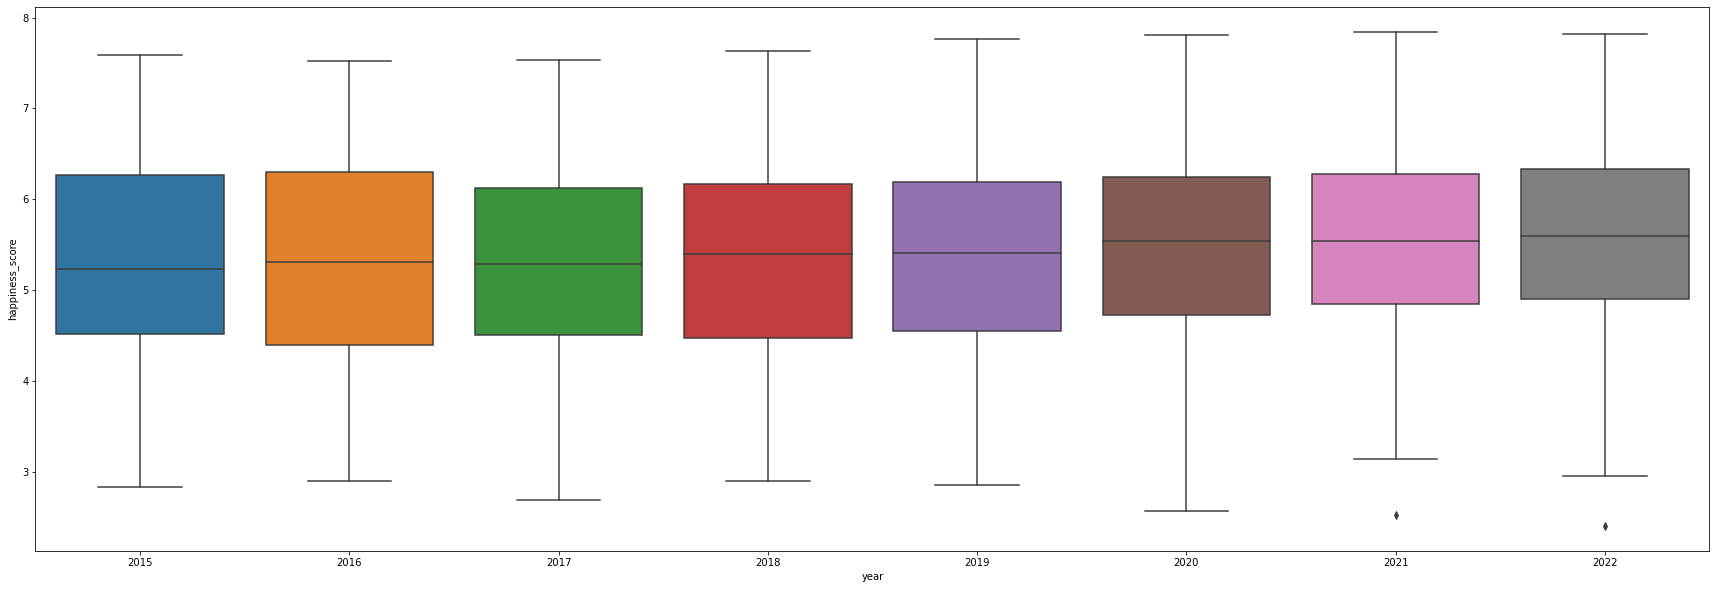

In [6]:

for year in main_df:
    if year == '2015':
        combined_df = main_df[year]
    combined_df = combined_df.append(main_df[year], ignore_index=True)
f = plt.figure(figsize=(30, 10))
sb.boxplot(x = 'year', y = 'happiness_score', data = combined_df)   


### By region over the years

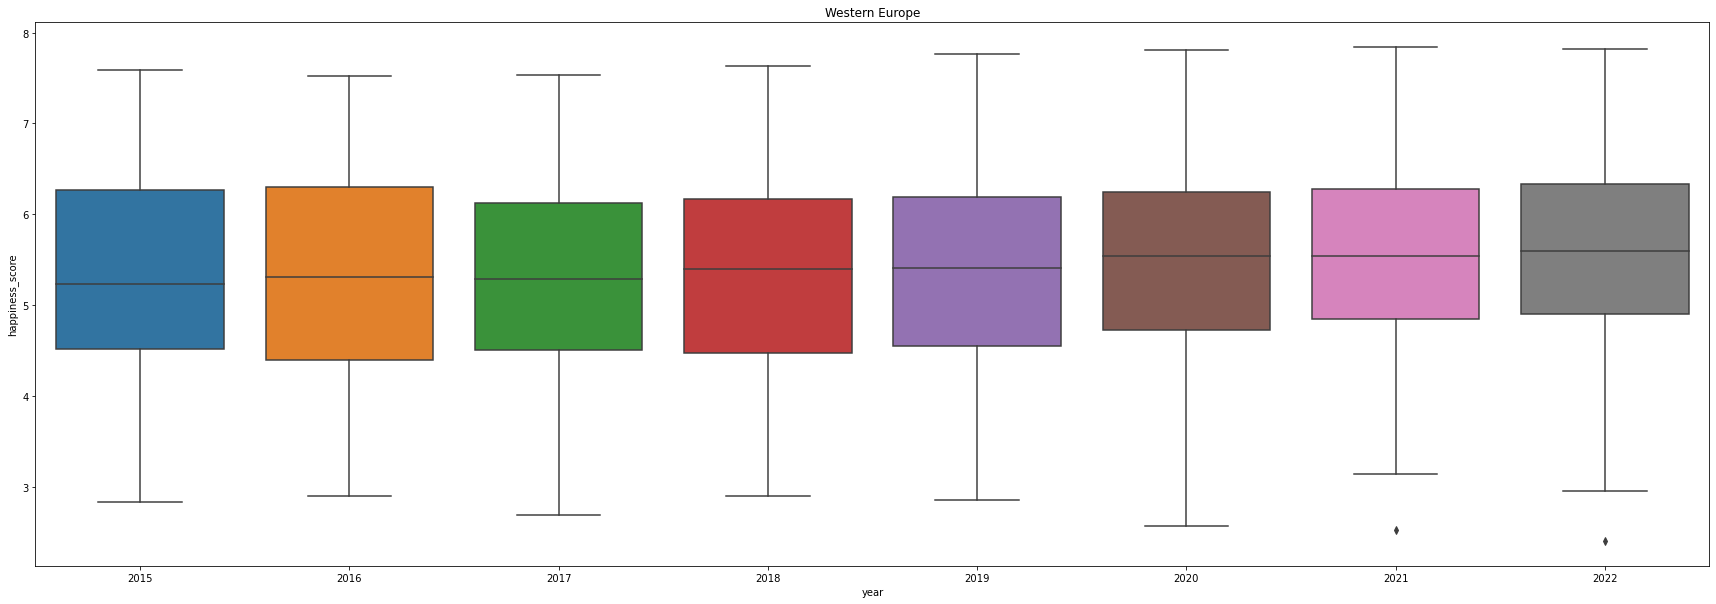

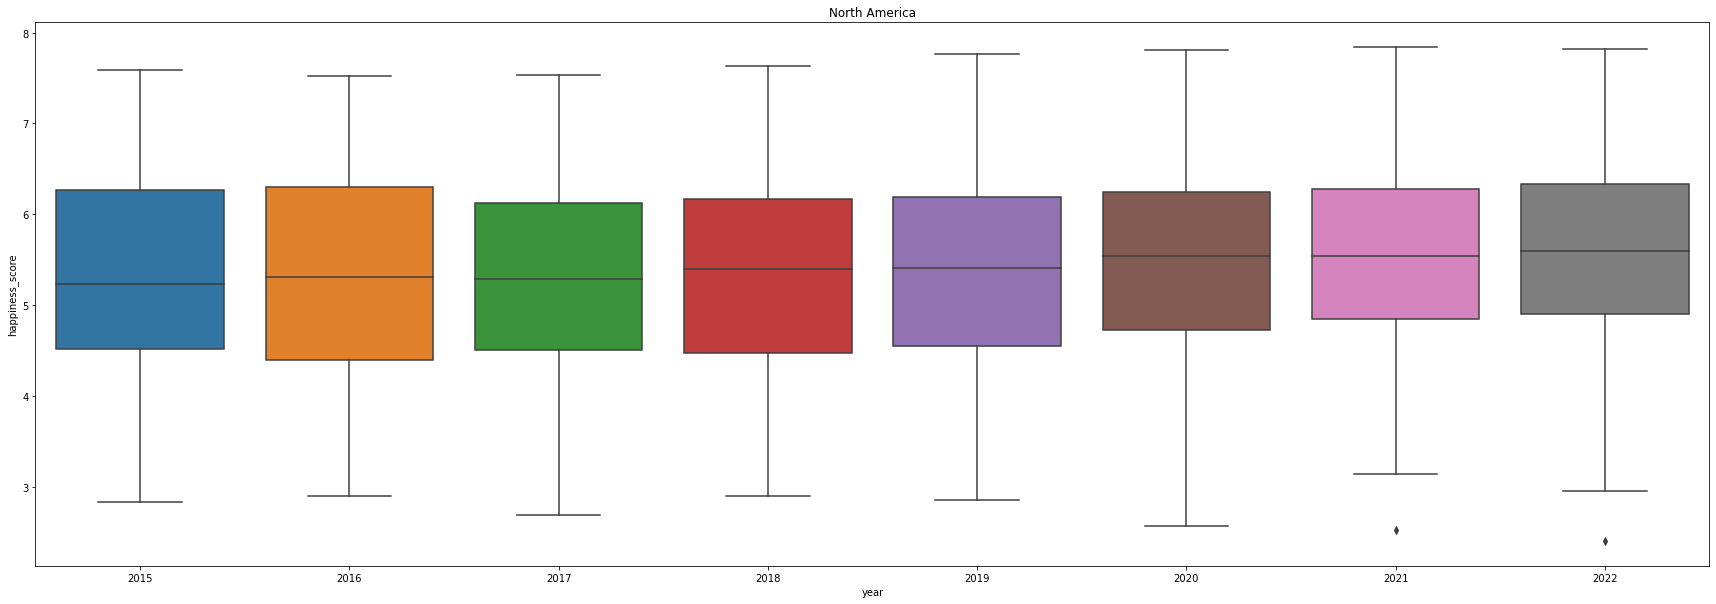

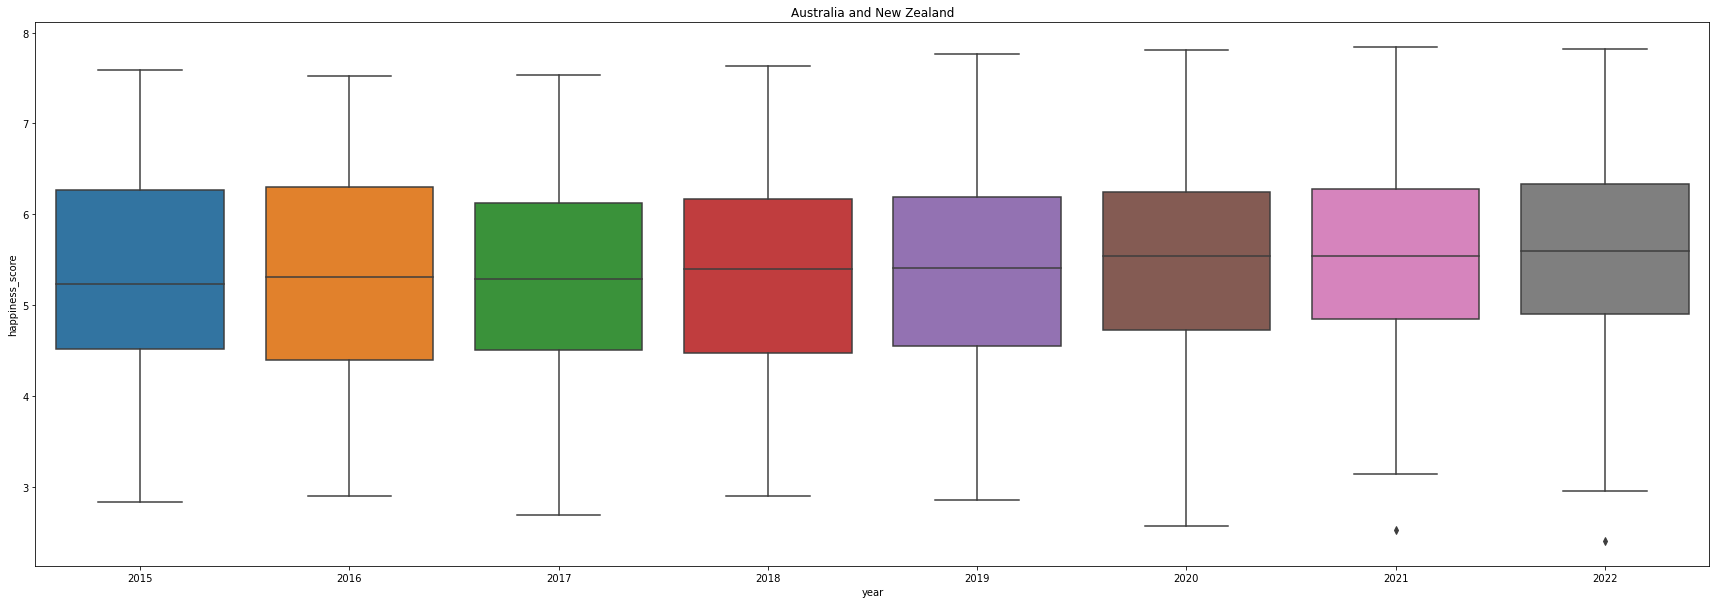

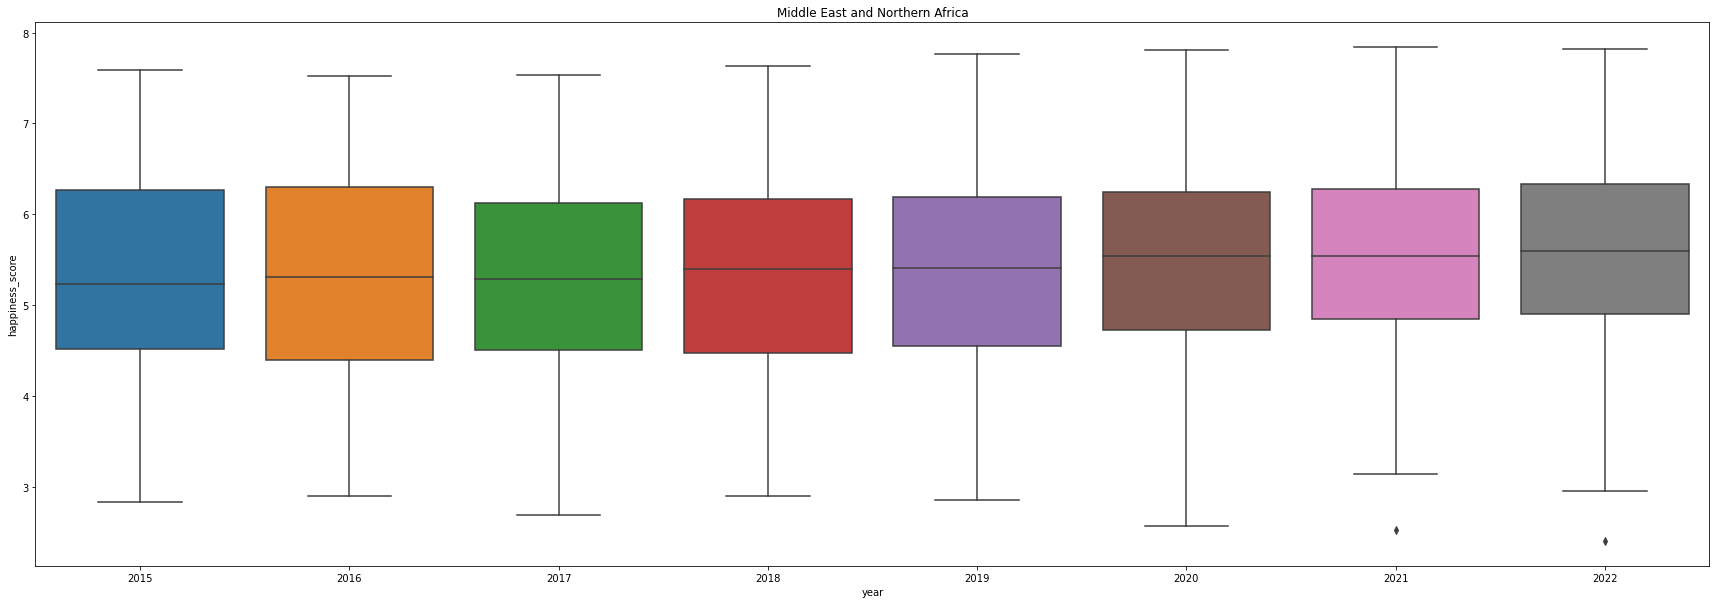

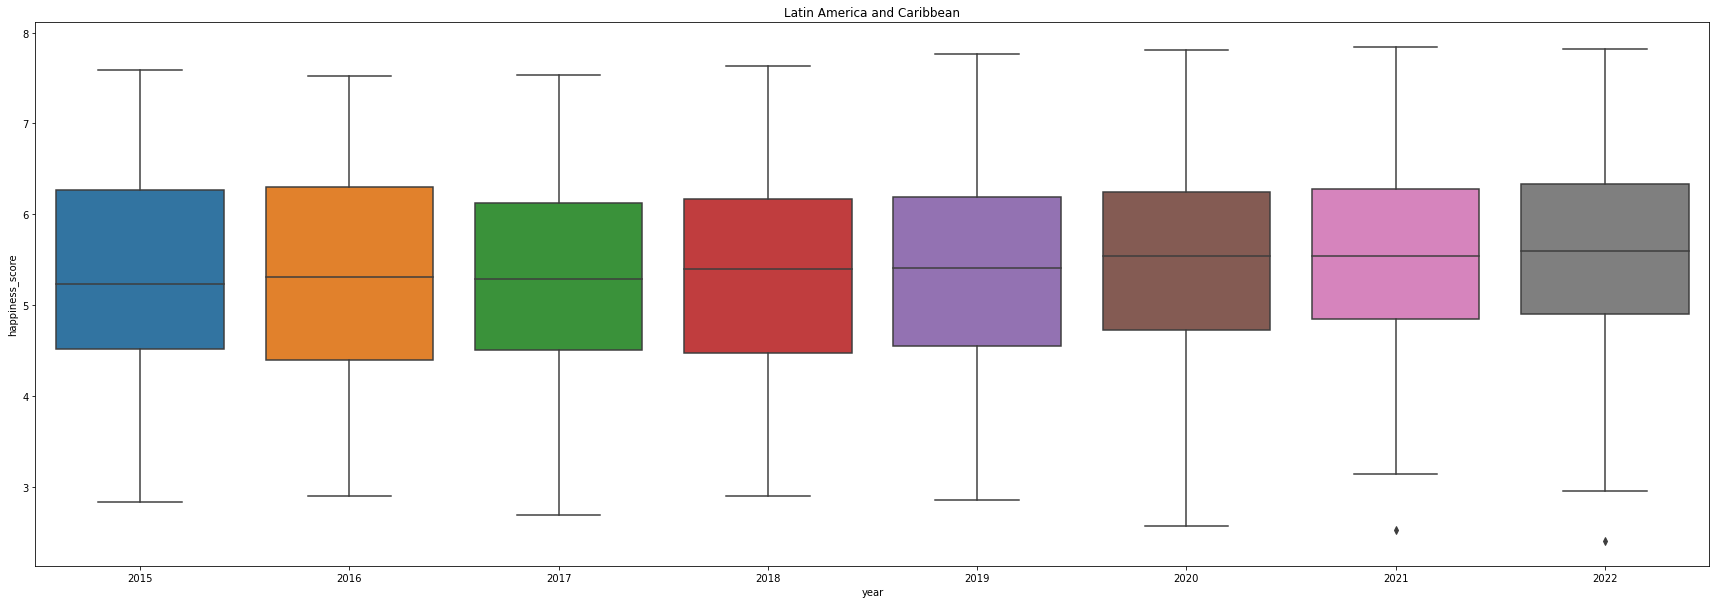

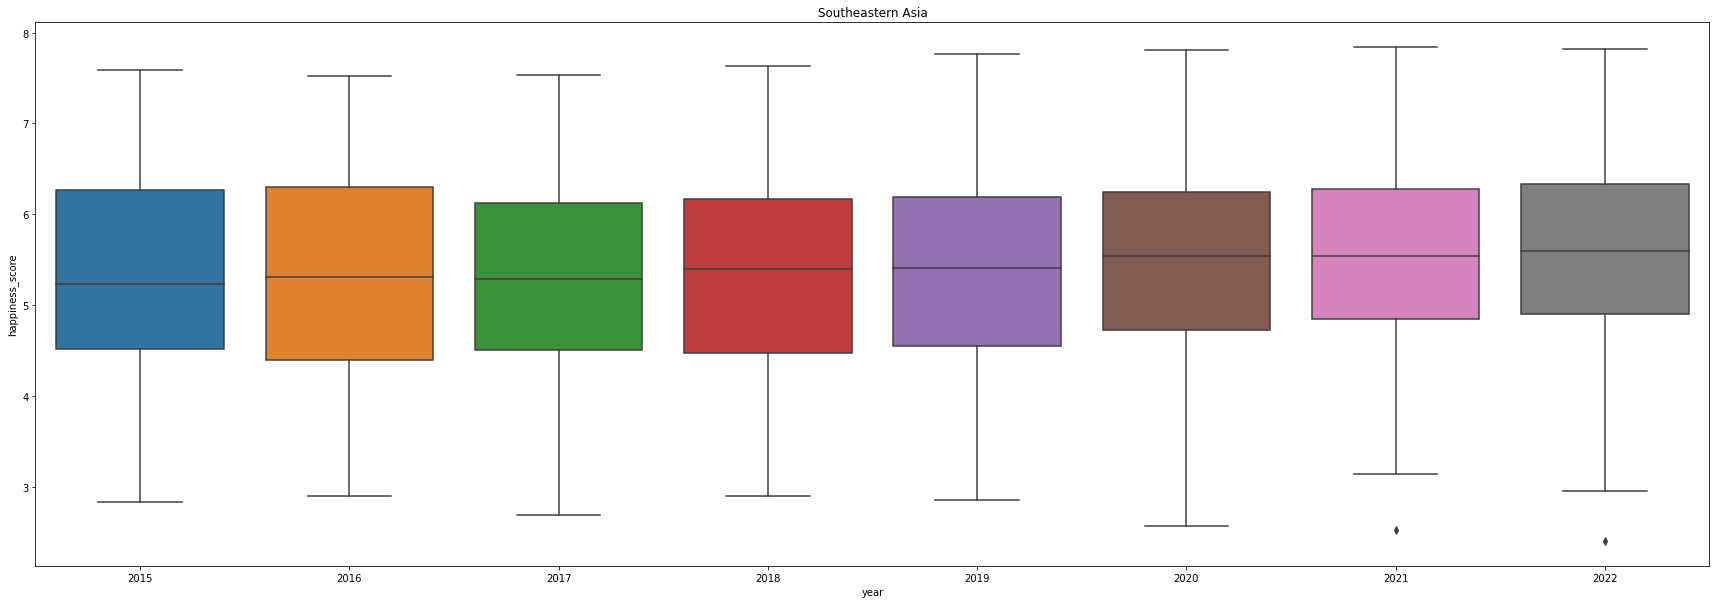

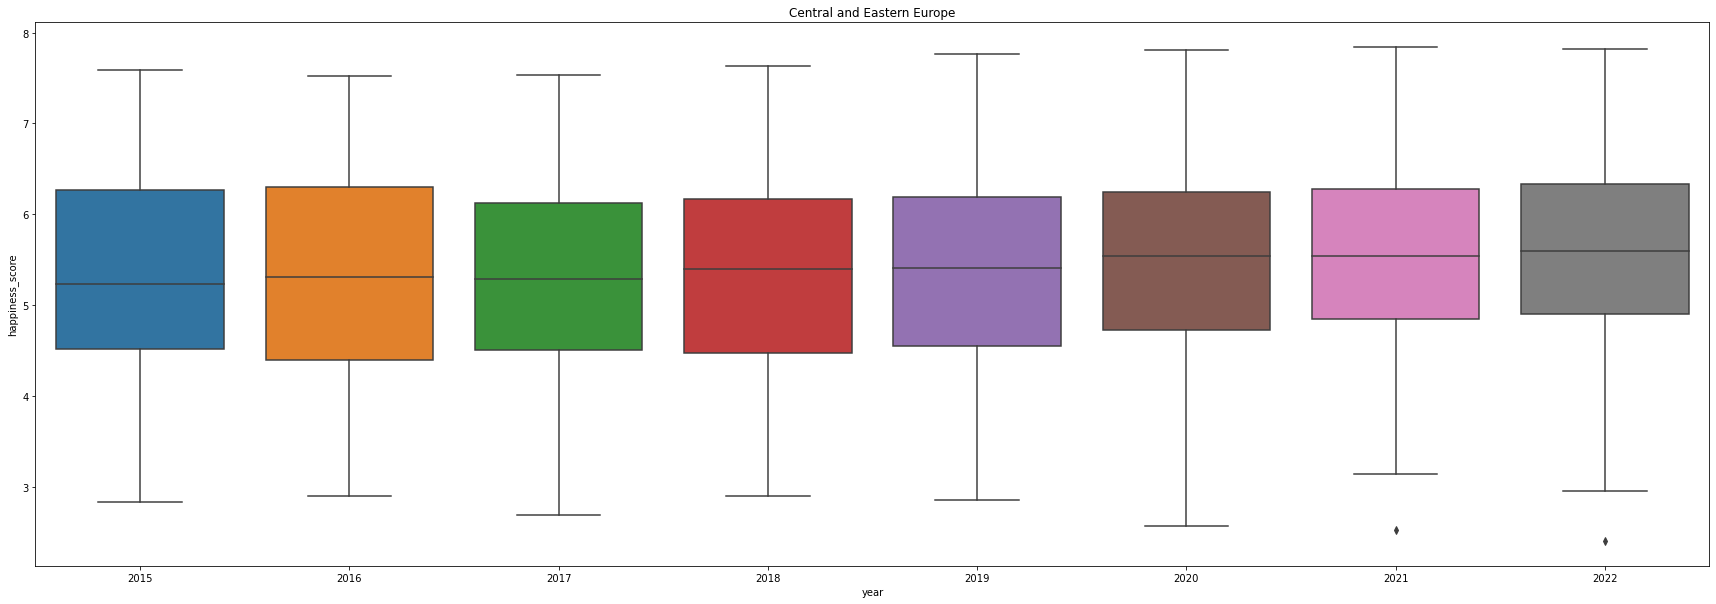

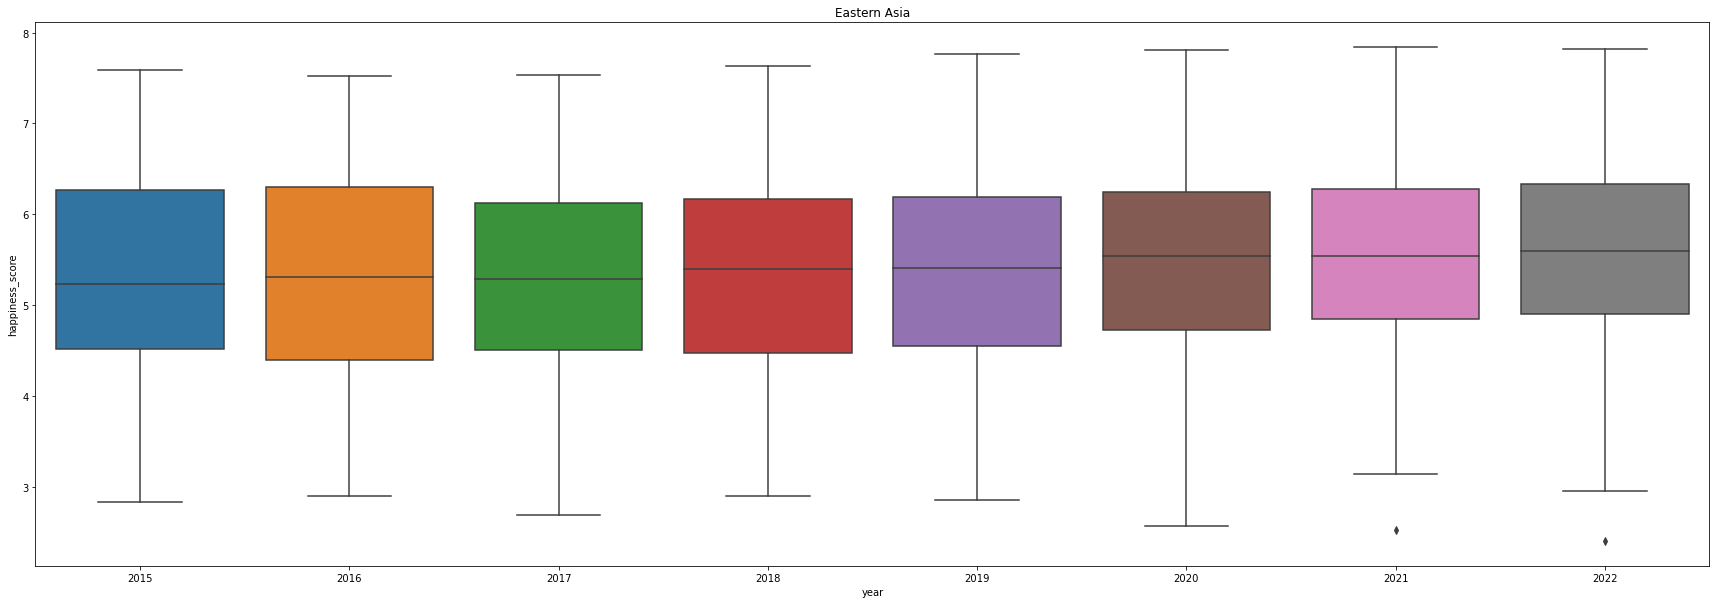

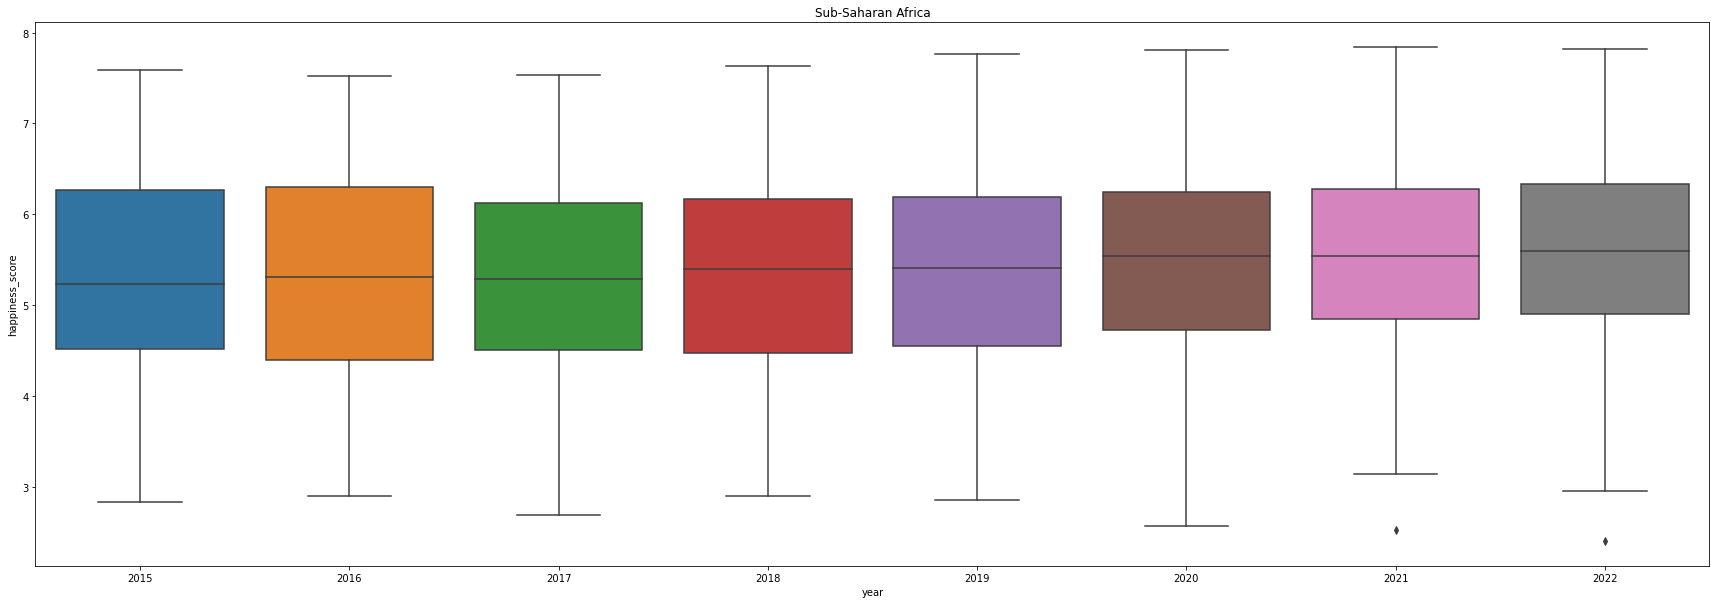

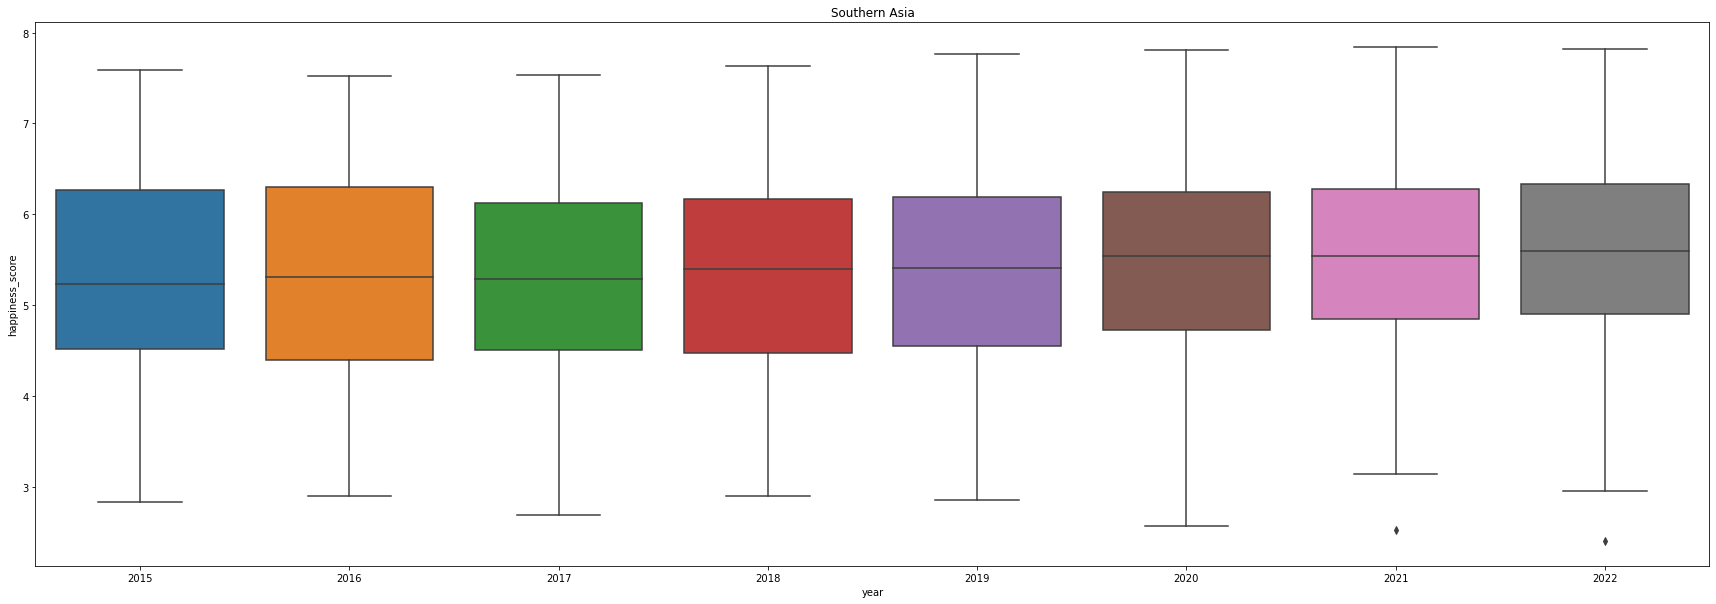

In [7]:
regions = main_df['2015']['regional_indicator'].unique()
for region in regions:
    data = combined_df[combined_df['regional_indicator'] == region]
    f = plt.figure(figsize=(30, 10))
    sb.boxplot(x = 'year', y = 'happiness_score', data = combined_df).set(title = region)   

## Comparing between countries 

### country with the greatest increase in happiness score between 2015 and 2022

In [8]:
countries = main_df['2015']['country'].unique()
max_diff = 0

for country in countries:
    try:
        diff = float(main_df['2022'][main_df['2022']['country'] == country]['happiness_score']) - float(main_df['2015'][main_df['2015']['country'] == country]['happiness_score'])
    except:
        continue
    if diff > max_diff:
        max_diff = diff
        max_diff_country = country
print(max_diff_country, max_diff)
   

Ivory Coast 1.5800000000000005


### Correlation matrix of each variables against happiness score

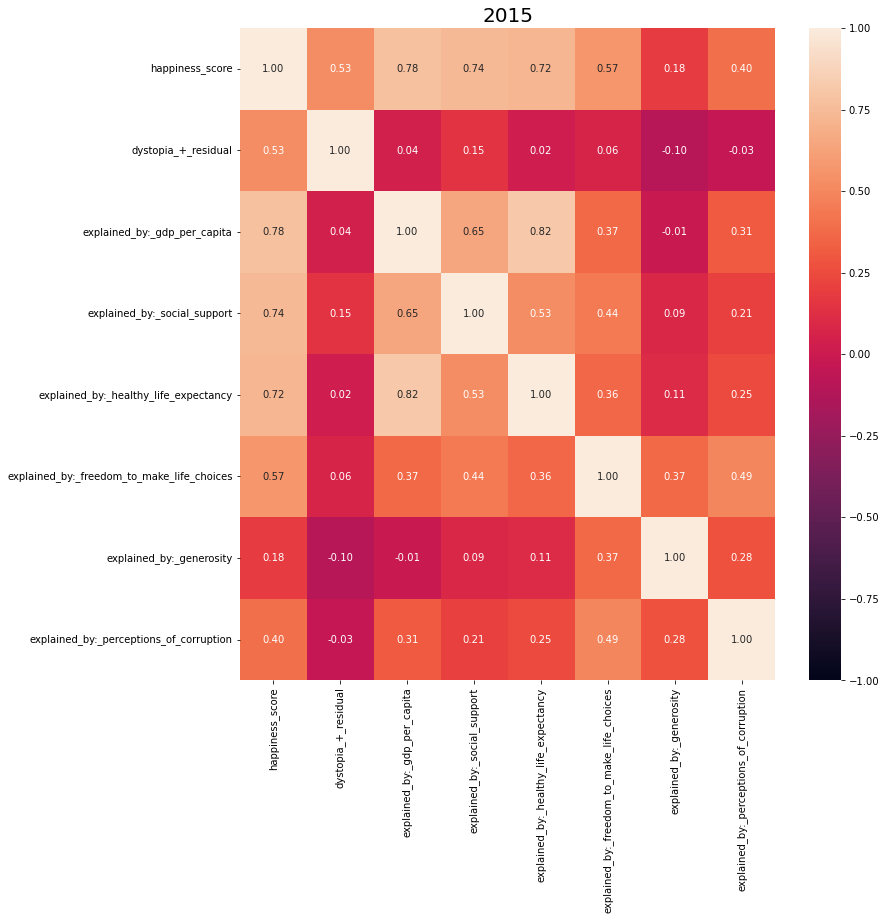

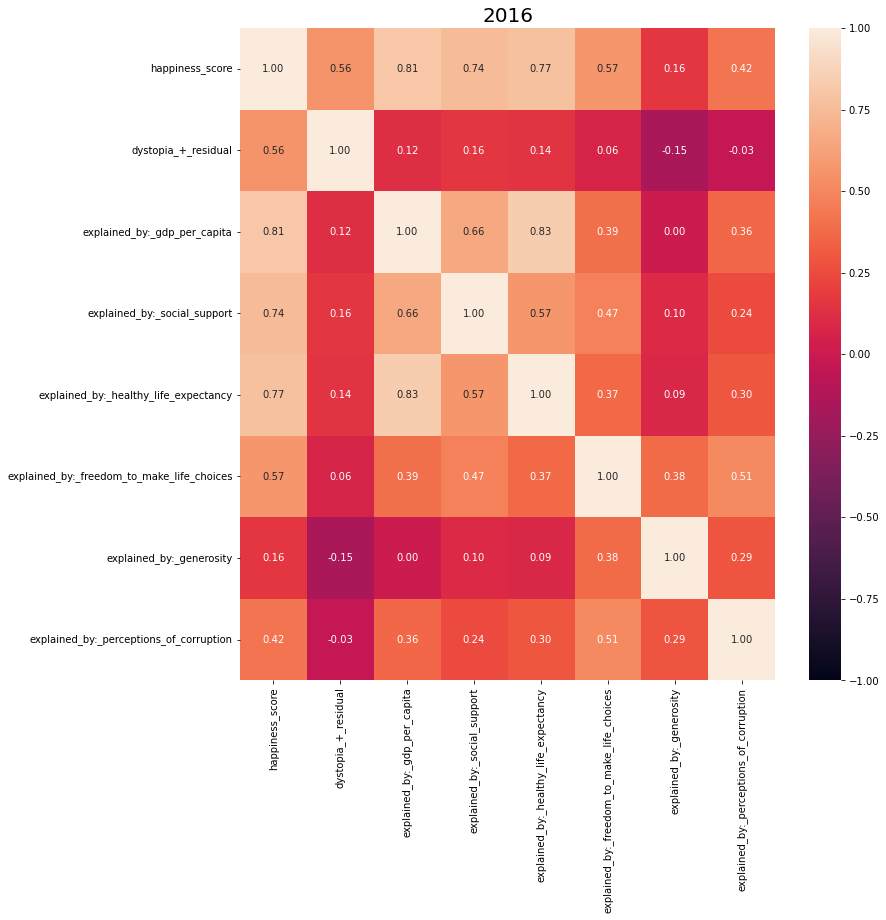

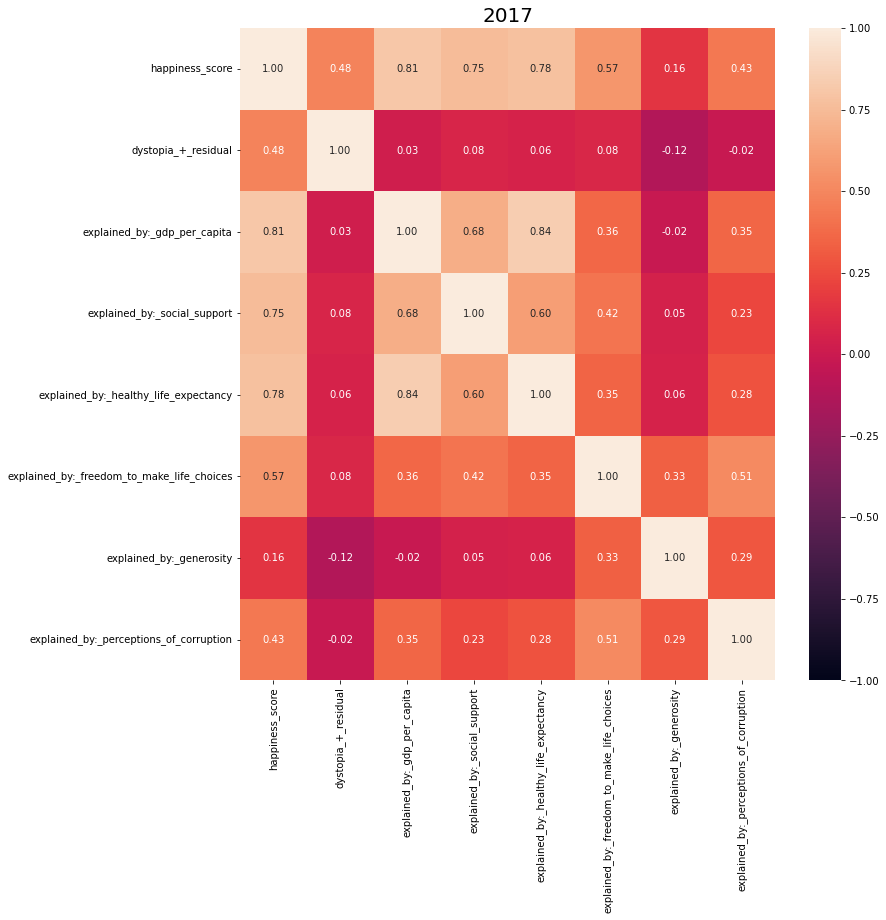

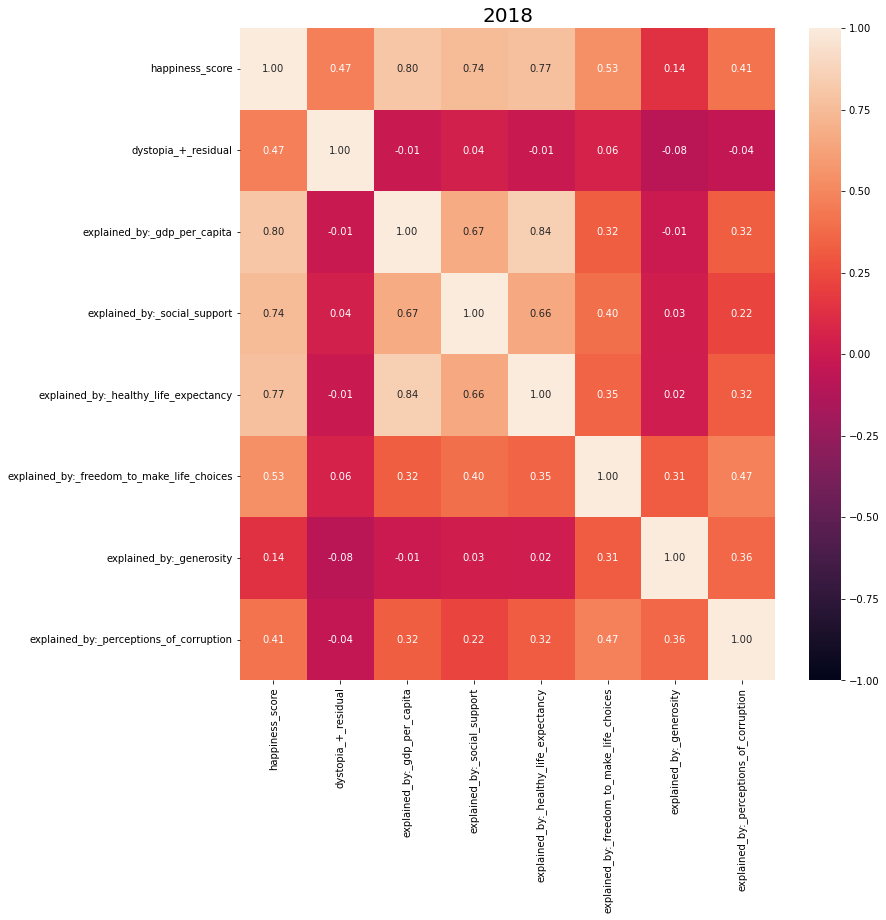

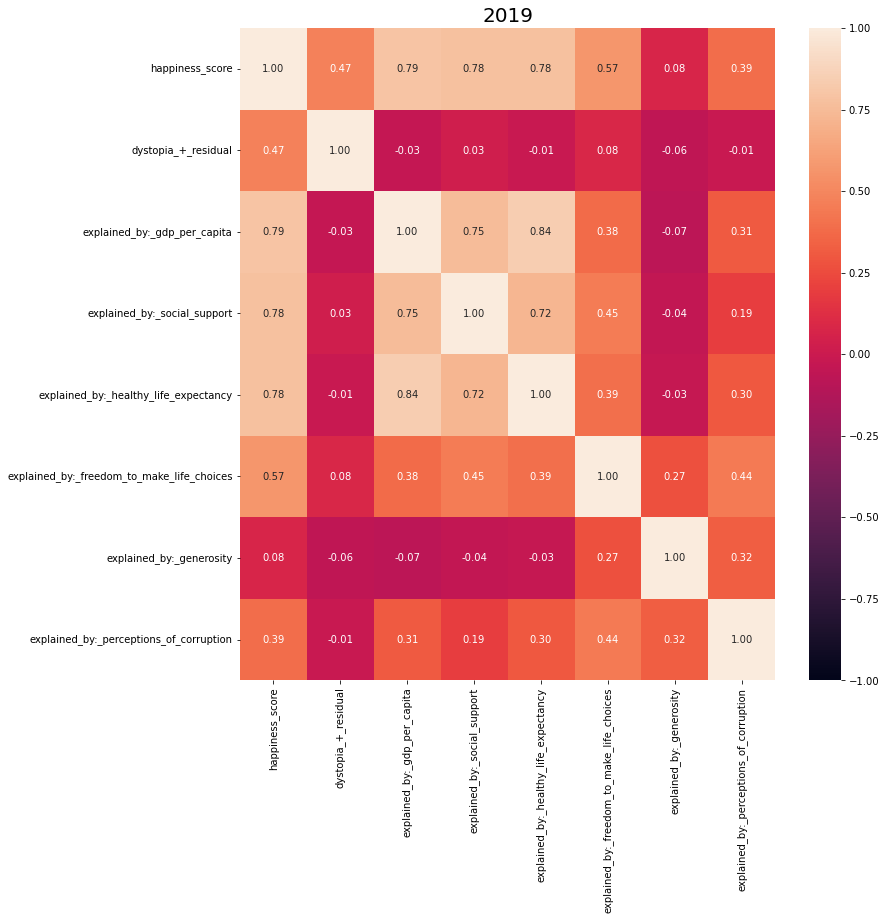

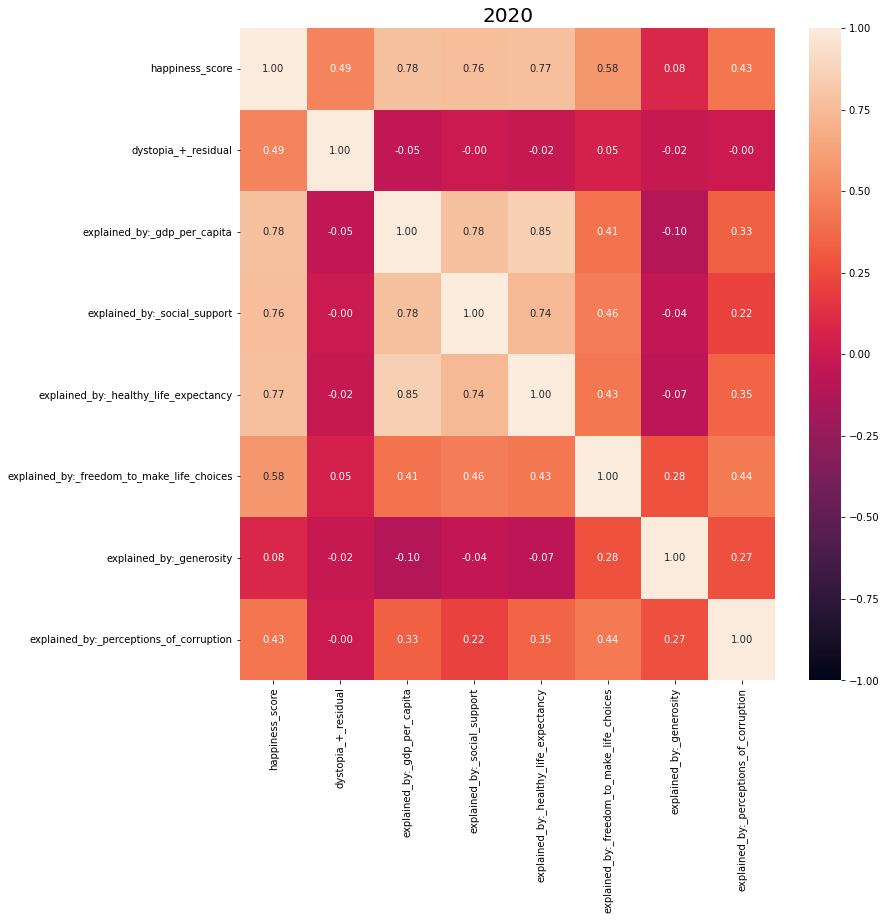

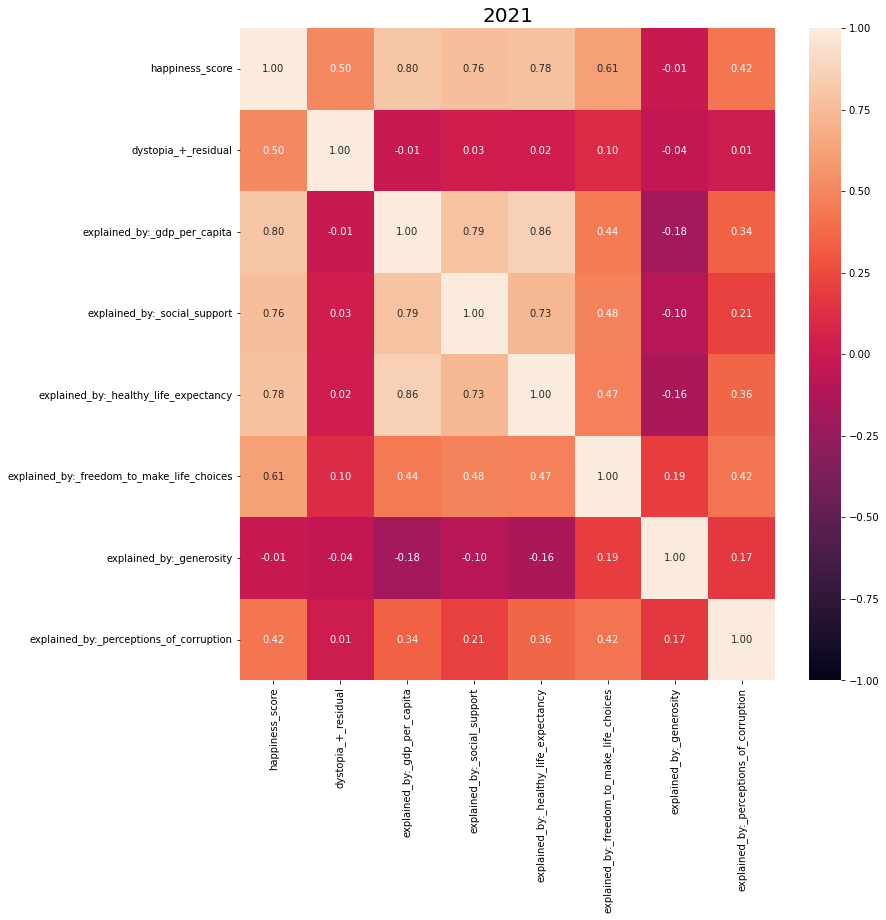

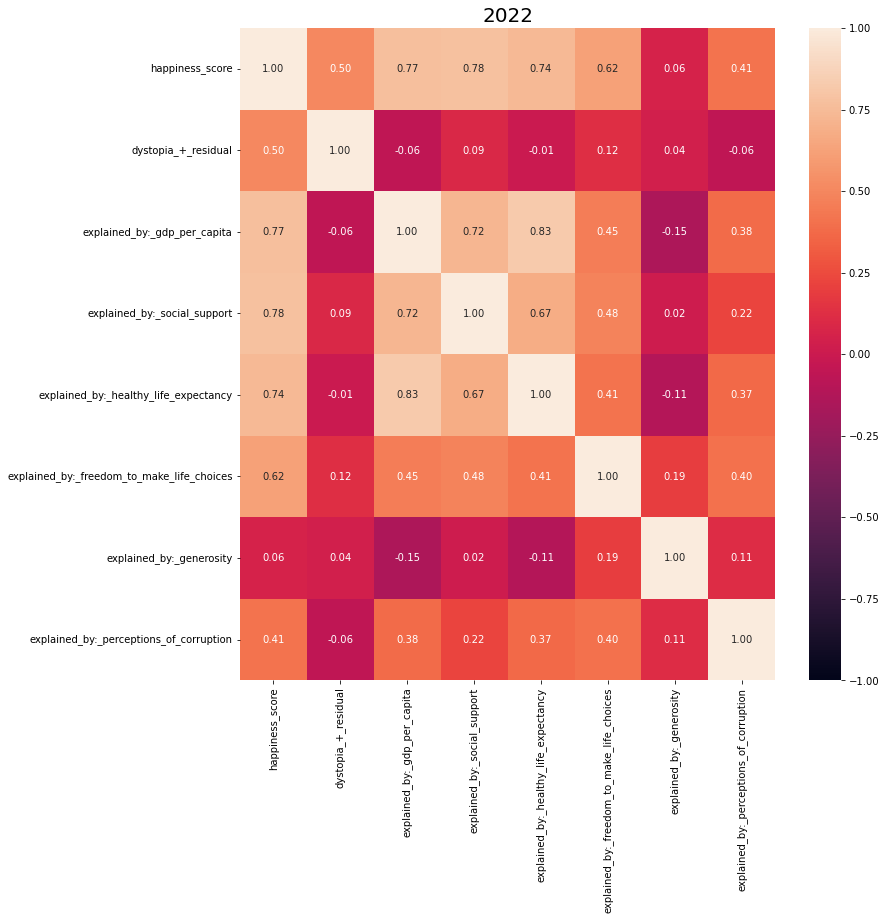

In [10]:
variables = ['happiness_score', 'dystopia_+_residual', 'explained_by:_gdp_per_capita', 'explained_by:_social_support', 'explained_by:_healthy_life_expectancy','explained_by:_freedom_to_make_life_choices', 'explained_by:_generosity', 'explained_by:_perceptions_of_corruption']
for year in main_df:
    numDF = main_df[year][variables]
    f = plt.figure(figsize=(12, 12))
    plt.title(year, fontsize = 20)
    sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
    
        

<AxesSubplot:title={'center':'combined dataset of all the years'}>

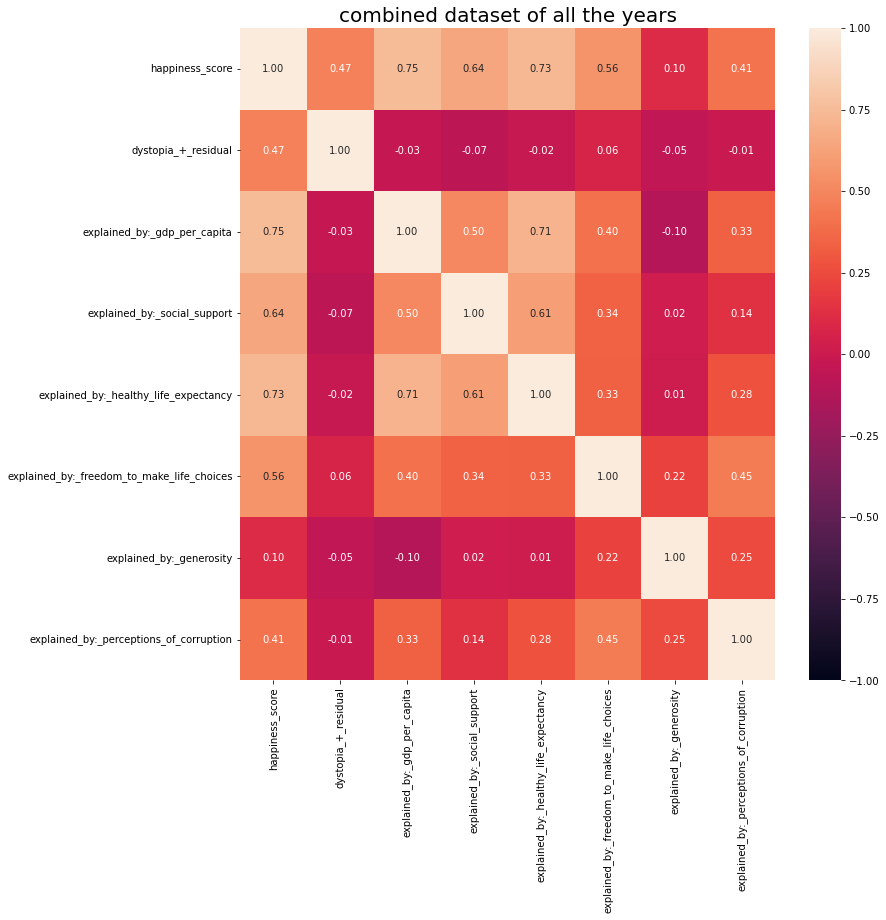

In [50]:
numDF = combined_df[variables]
f = plt.figure(figsize=(12, 12))
plt.title('combined dataset of all the years', fontsize = 20)
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

### Regression analysis

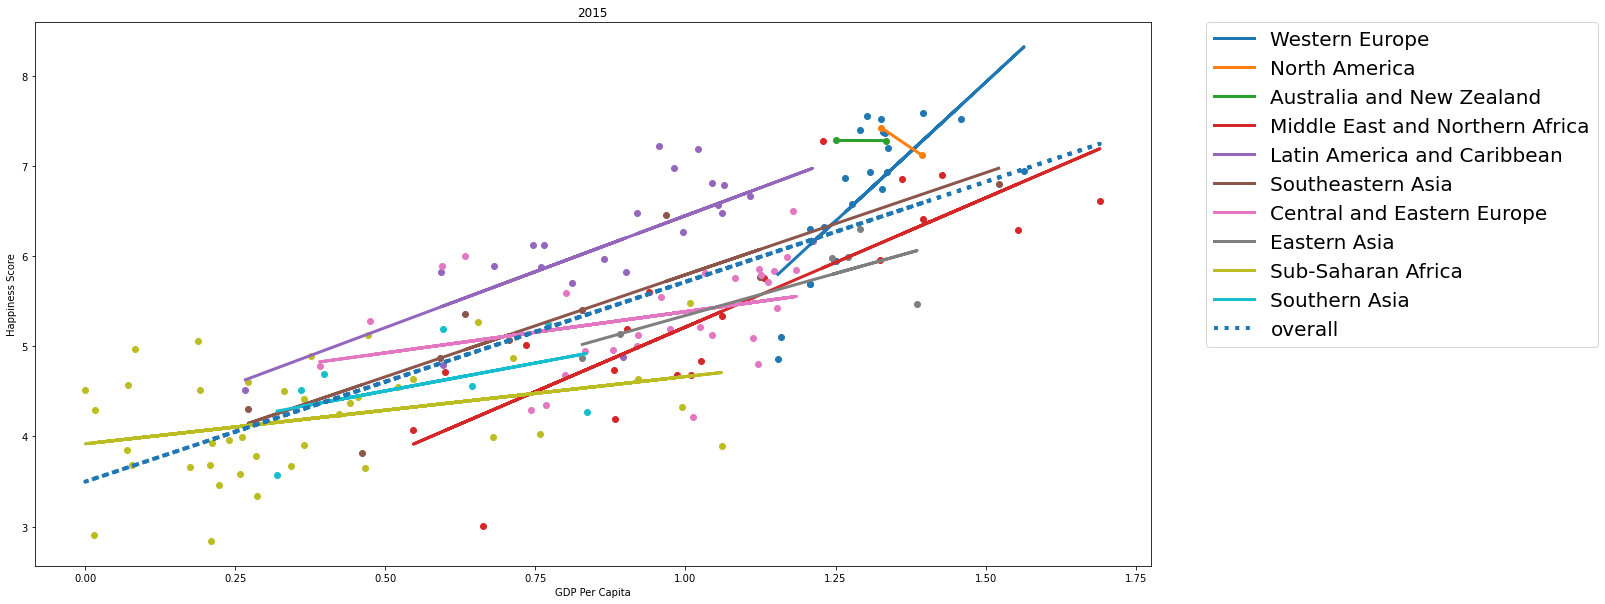

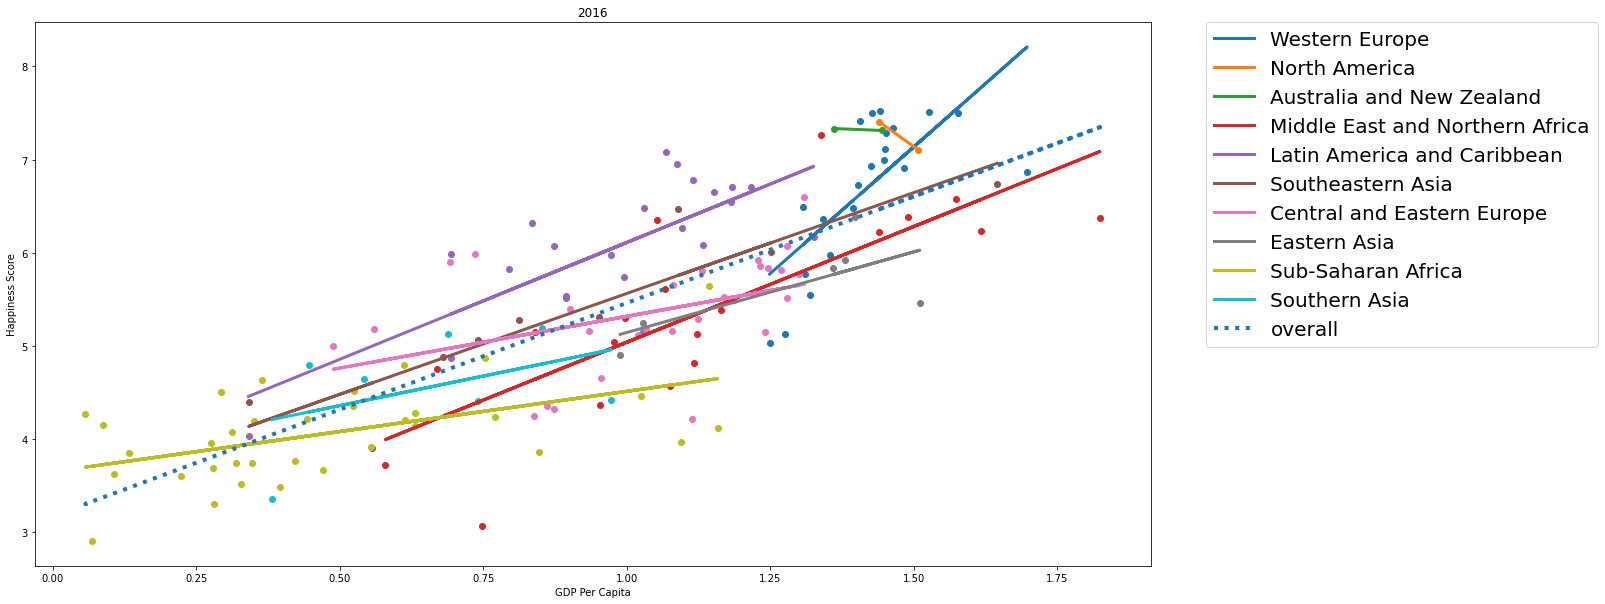

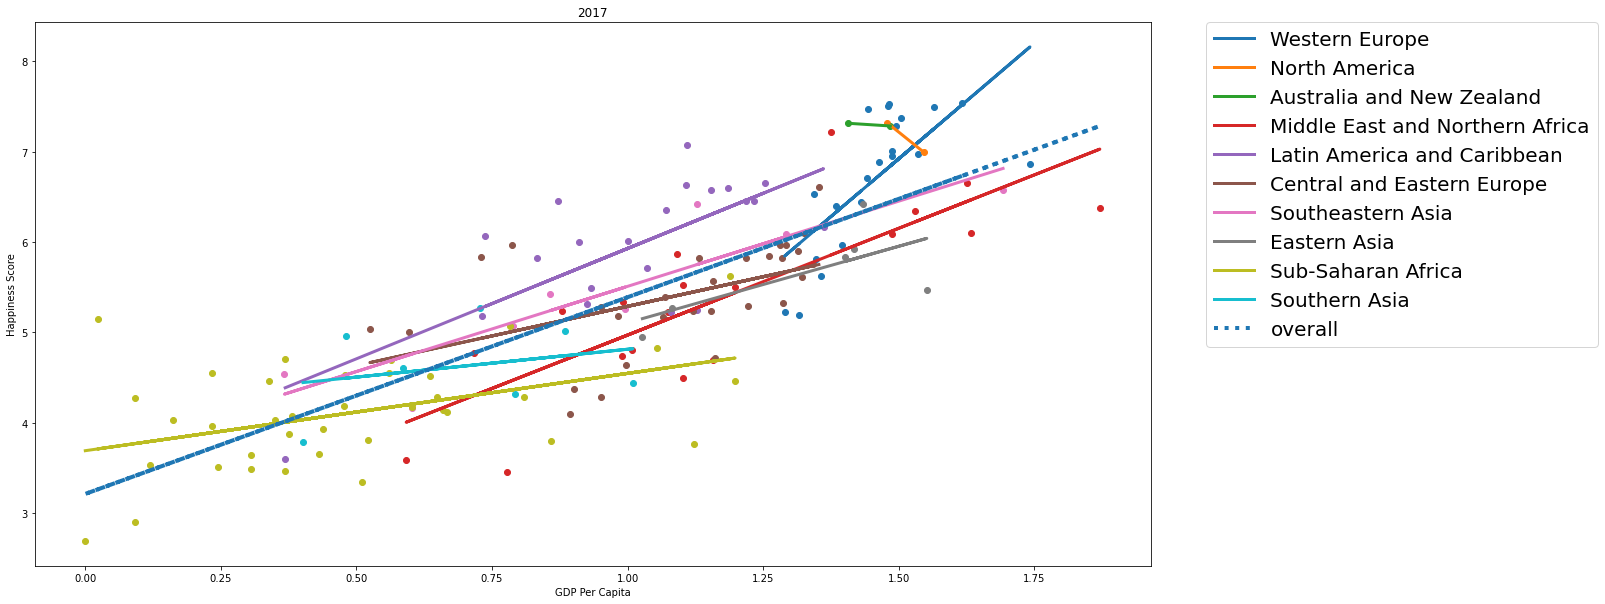

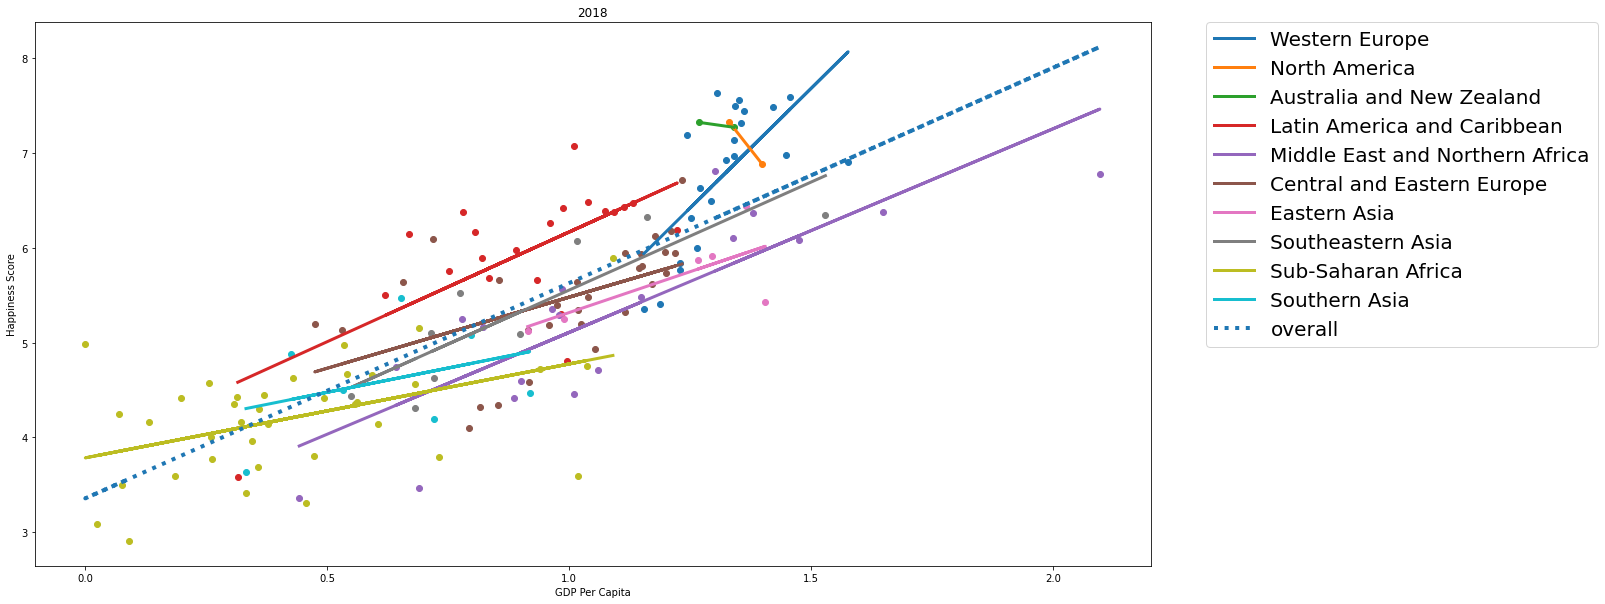

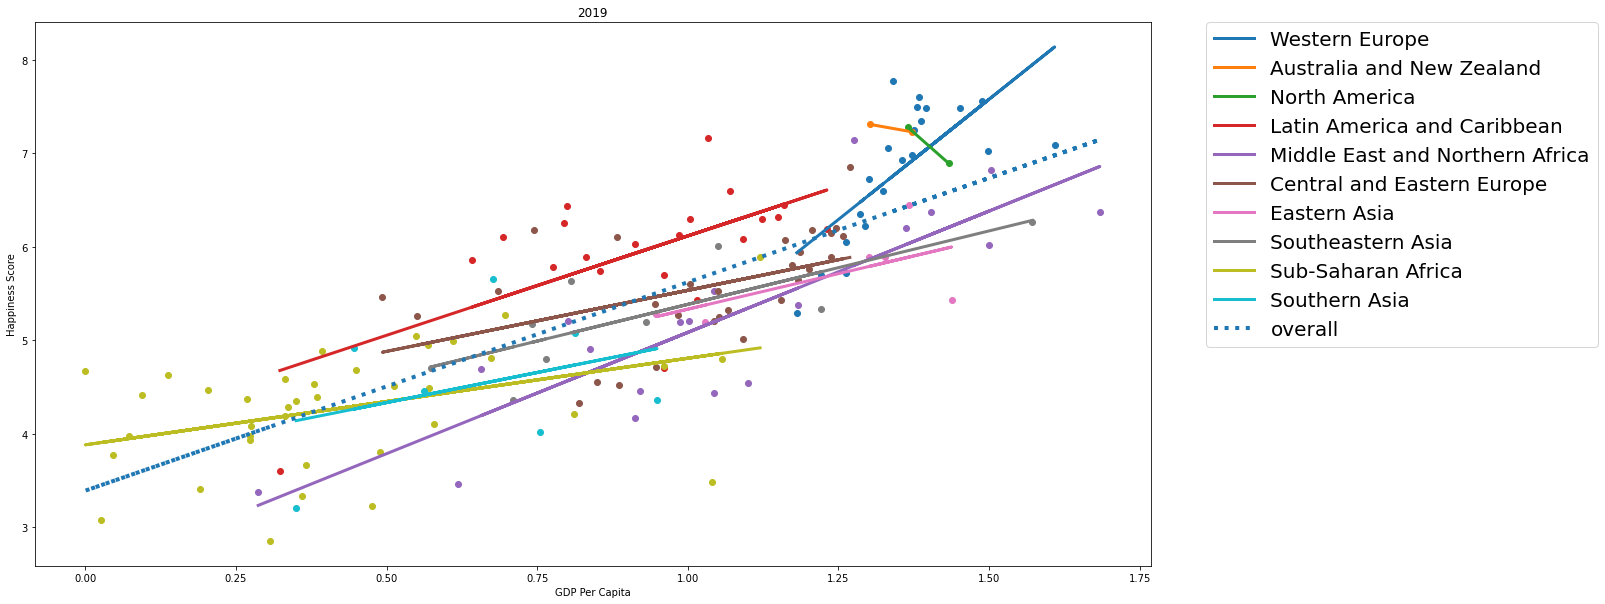

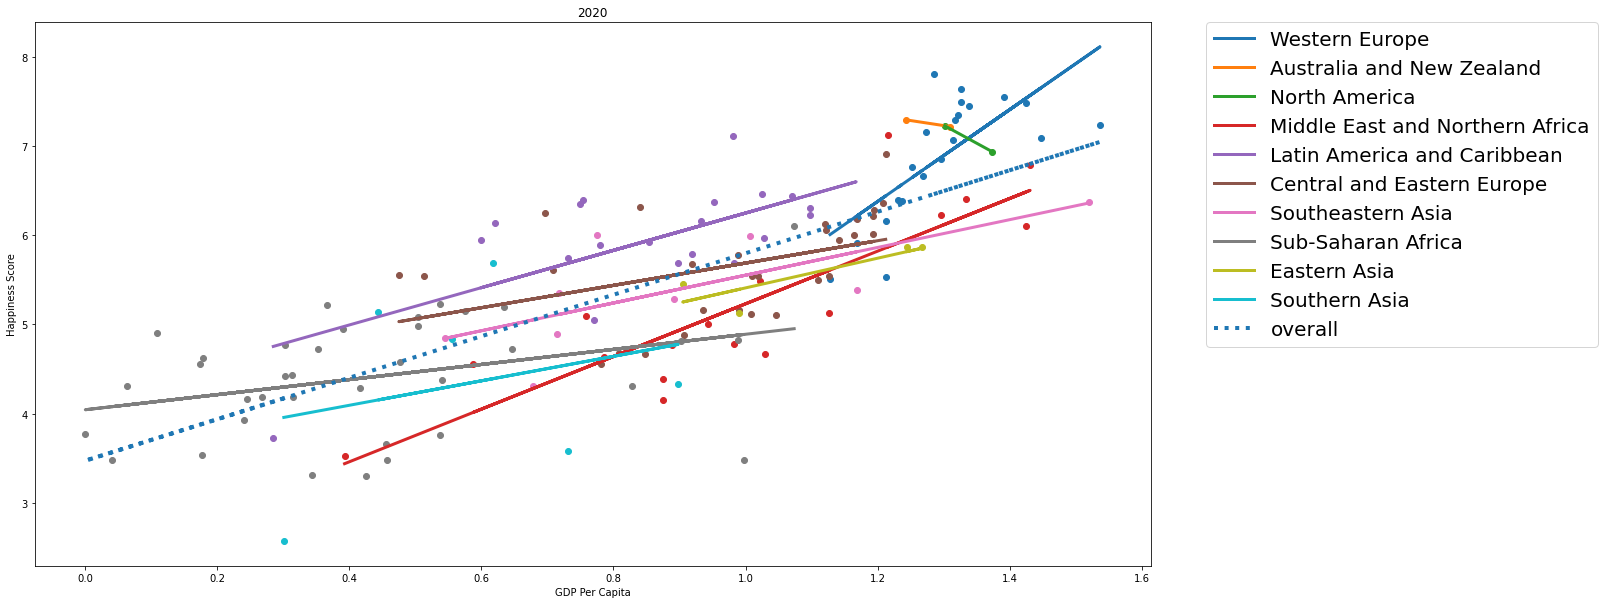

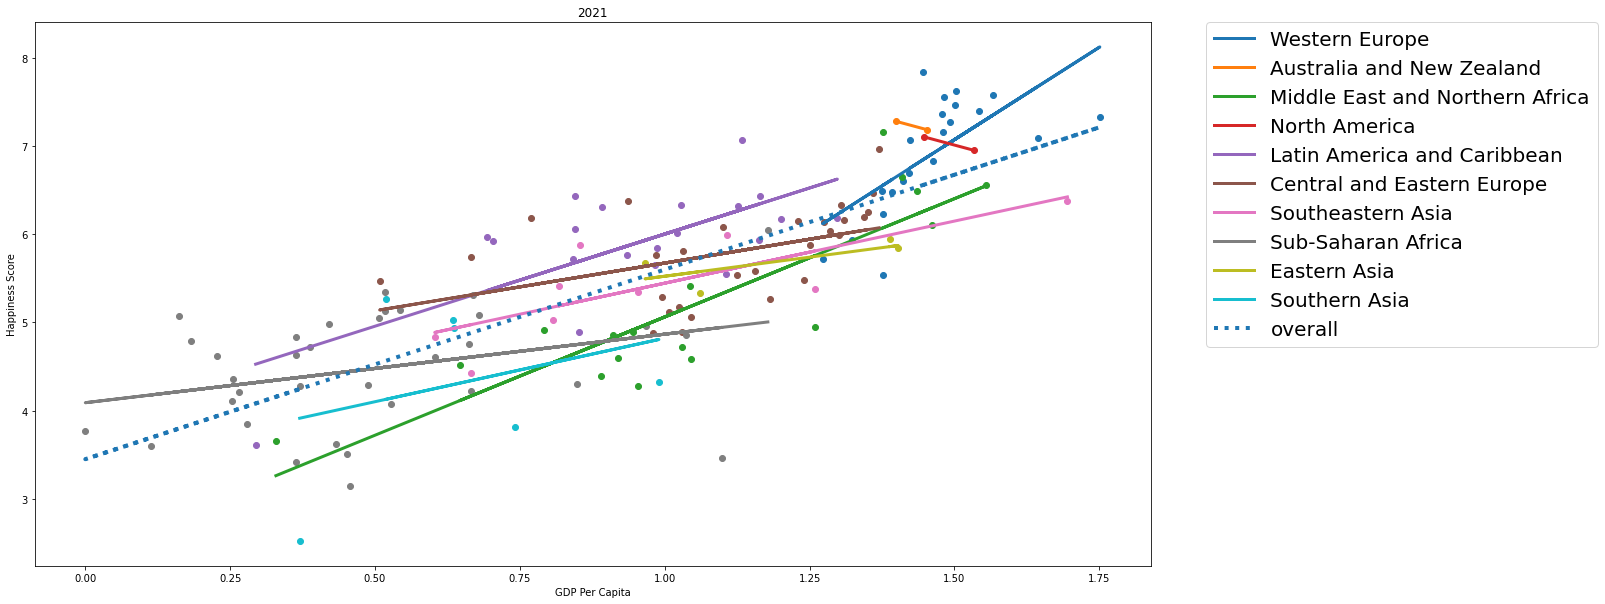

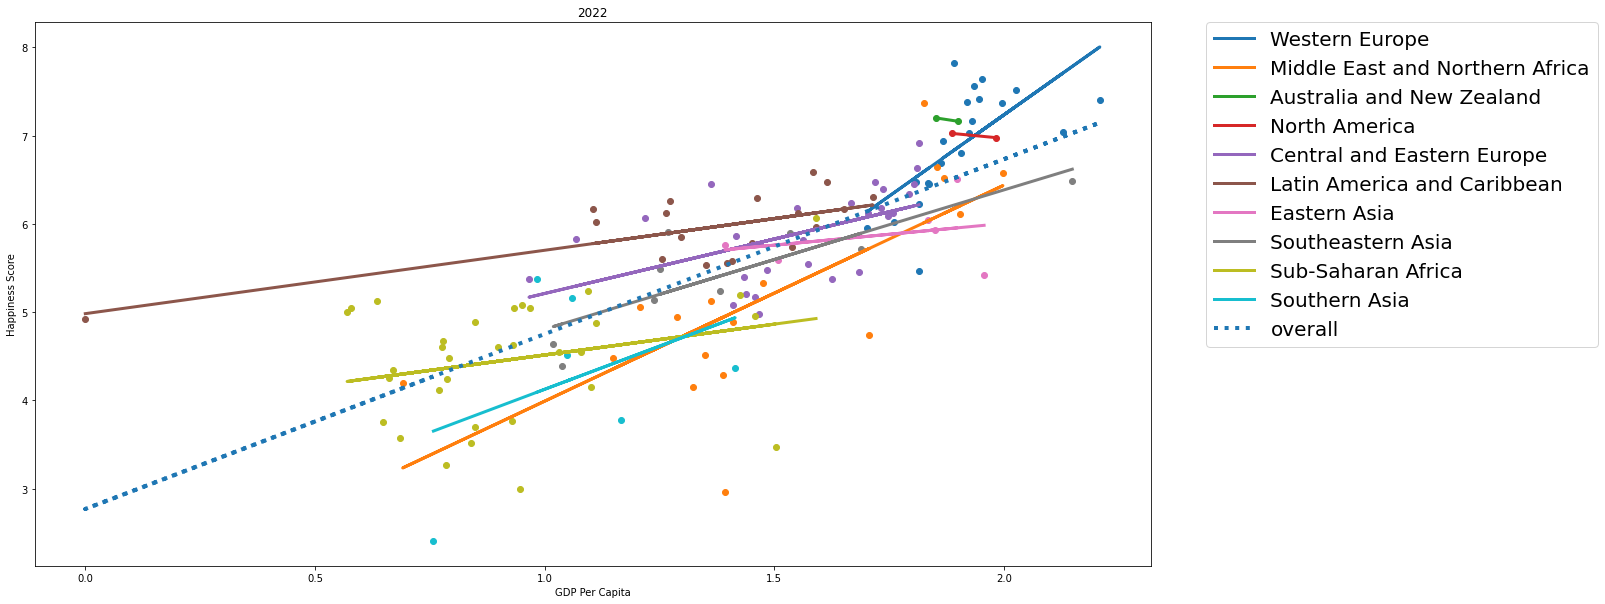

In [62]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()
for year in range(2015,2023):
    year = str(year)
    regions = main_df[year]['regional_indicator'].unique()
    f = plt.figure(figsize=(20, 10))
    for region in regions:
        happiness = main_df[year][main_df[year]['regional_indicator'] == region]['happiness_score']
        gdp = main_df[year][main_df[year]['regional_indicator'] == region]['explained_by:_gdp_per_capita']
        happiness = happiness.values.reshape(-1, 1)
        gdp = gdp.values.reshape(-1,1)
        linreg.fit(gdp, happiness)
        regline_x = gdp
        regline_y = linreg.intercept_ + linreg.coef_ * gdp
    
        # Plot the Linear Regression line
        plt.scatter(gdp, happiness)
        plt.plot(regline_x, regline_y, linewidth = 3, label = region)
        
    gdp = main_df[year]['explained_by:_gdp_per_capita']
    happiness = main_df[year]['happiness_score']
    happiness = happiness.values.reshape(-1, 1)
    gdp = gdp.values.reshape(-1,1)
    linreg.fit(gdp, happiness)
    regline_x = gdp
    regline_y = linreg.intercept_ + linreg.coef_ * gdp
    plt.plot(regline_x, regline_y, linewidth = 4, label = 'overall', linestyle = ':')
    
    plt.xlabel('GDP Per Capita',);
    plt.ylabel('Happiness Score');
    plt.title(year)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 20);
    plt.show()

    

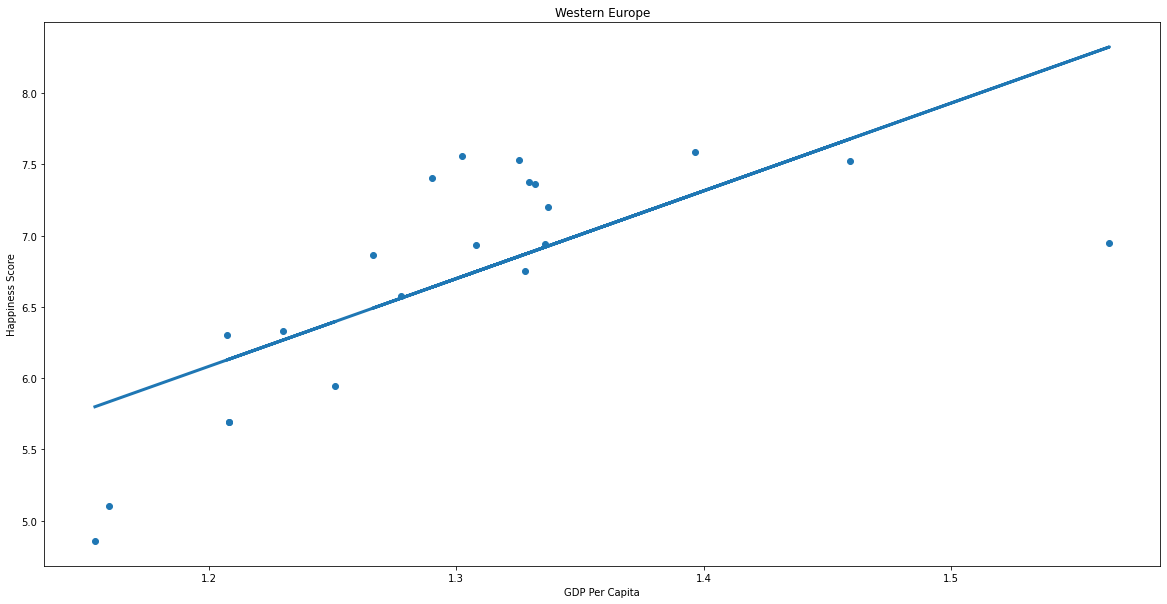

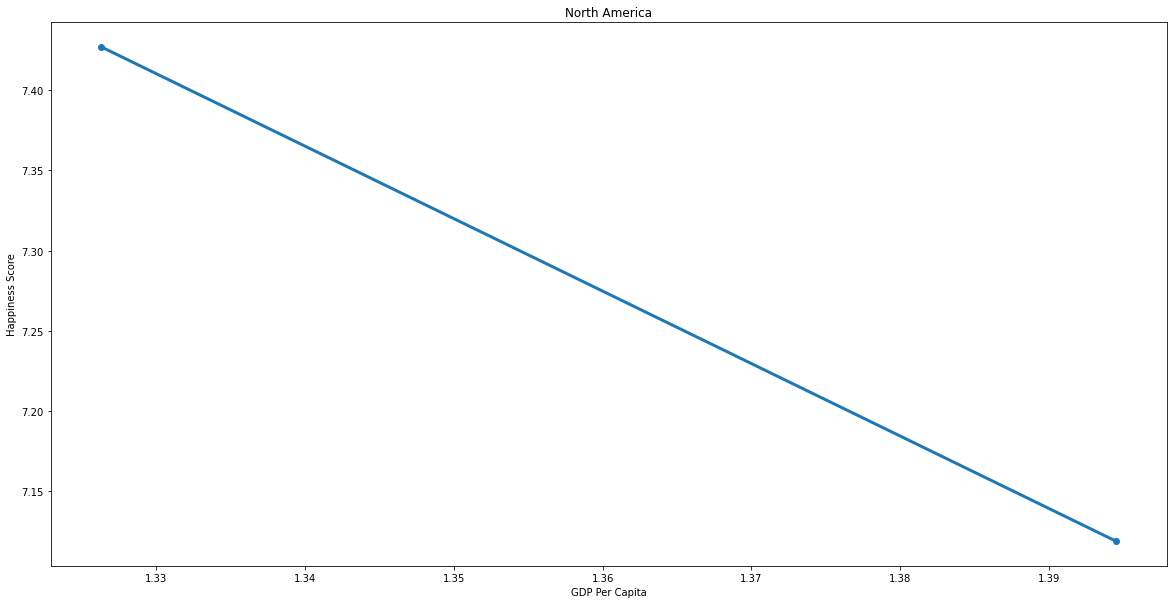

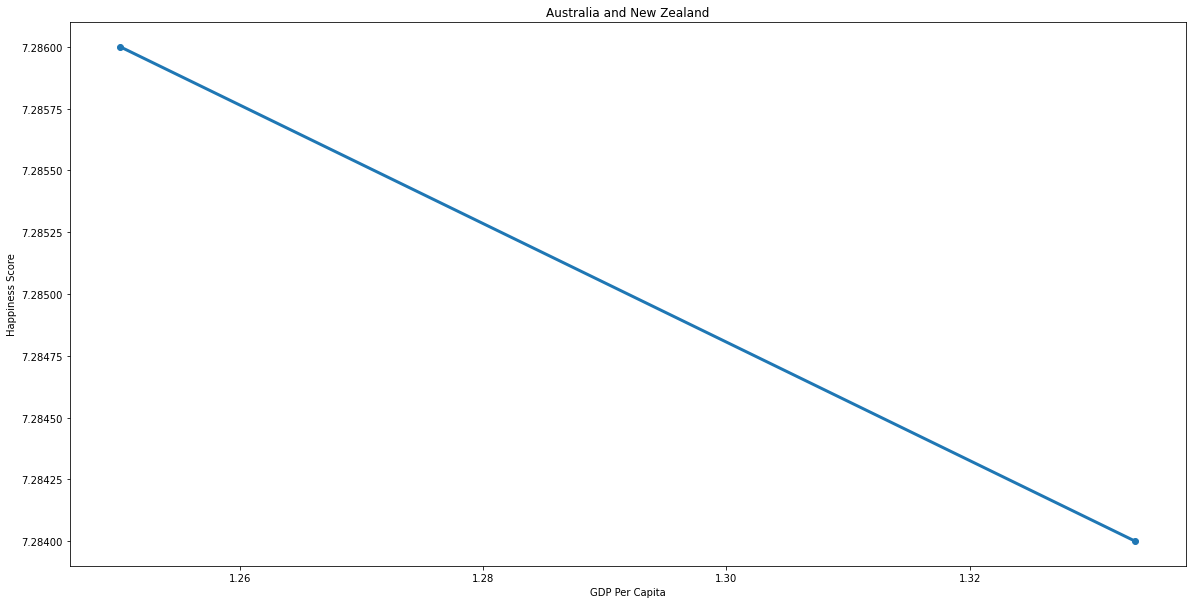

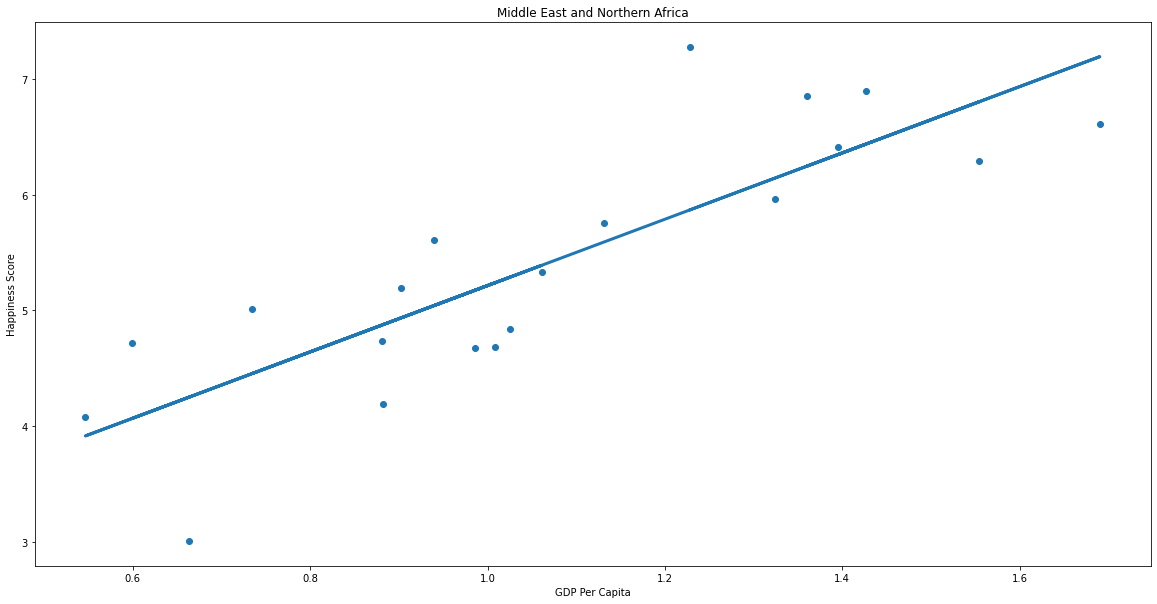

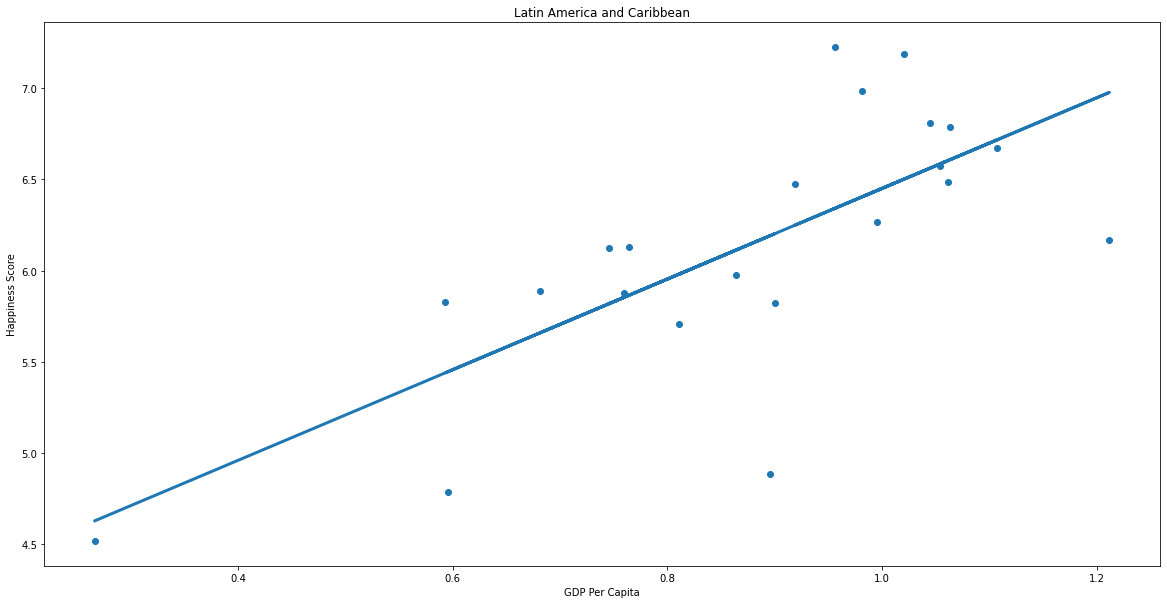

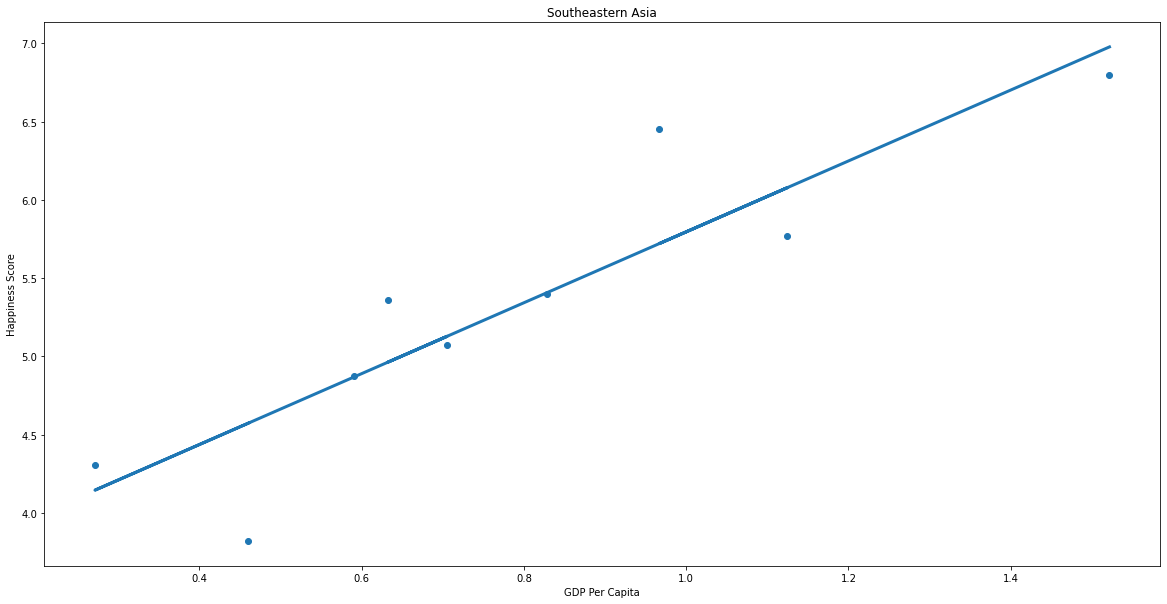

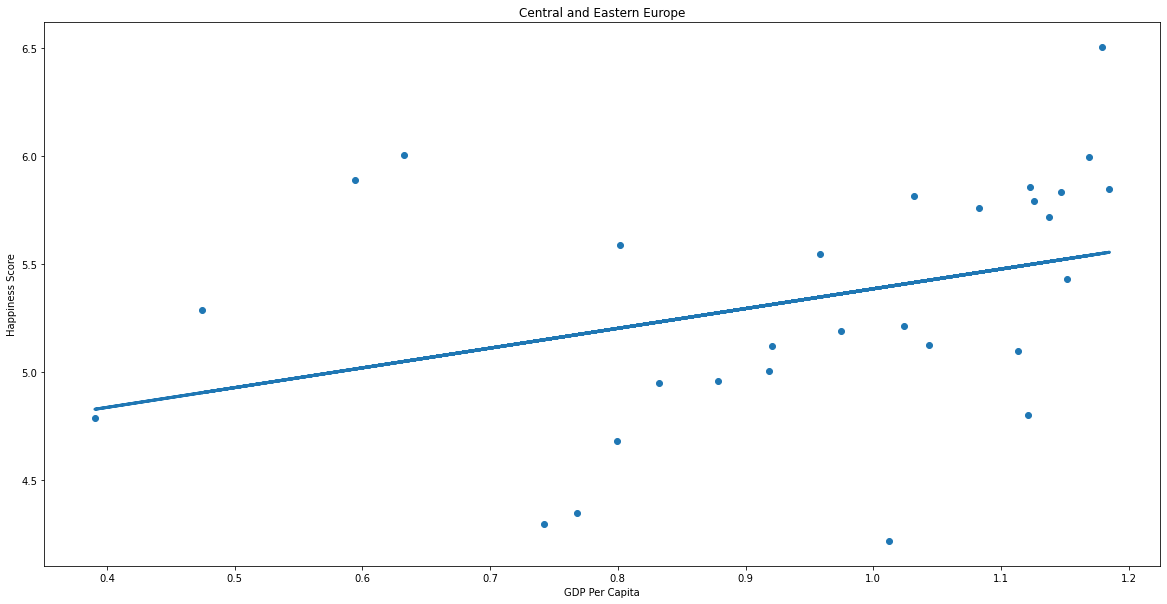

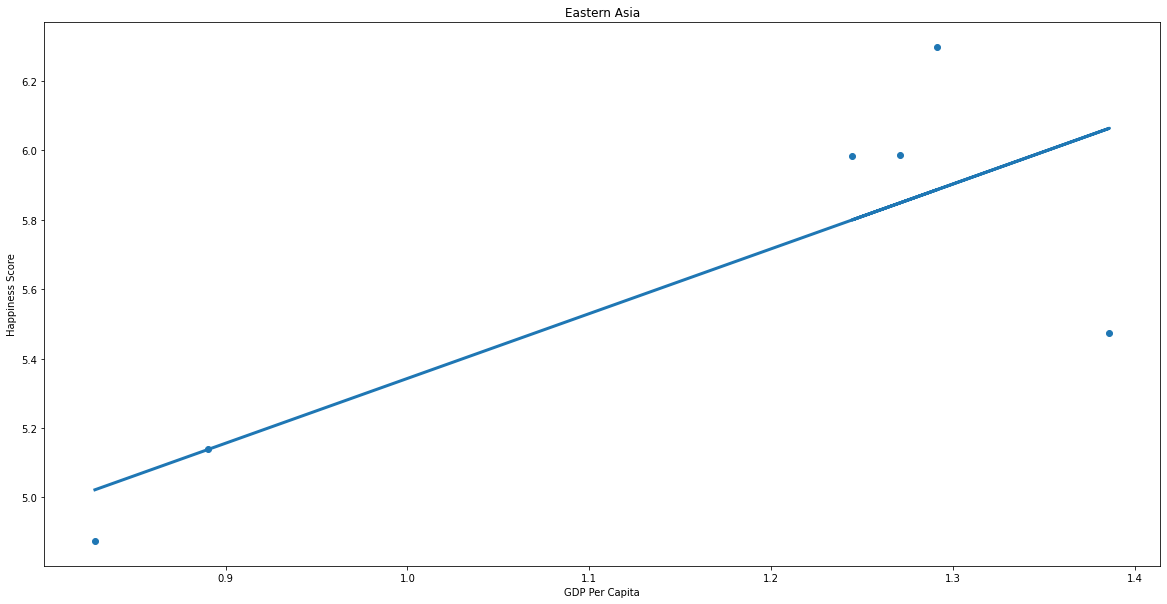

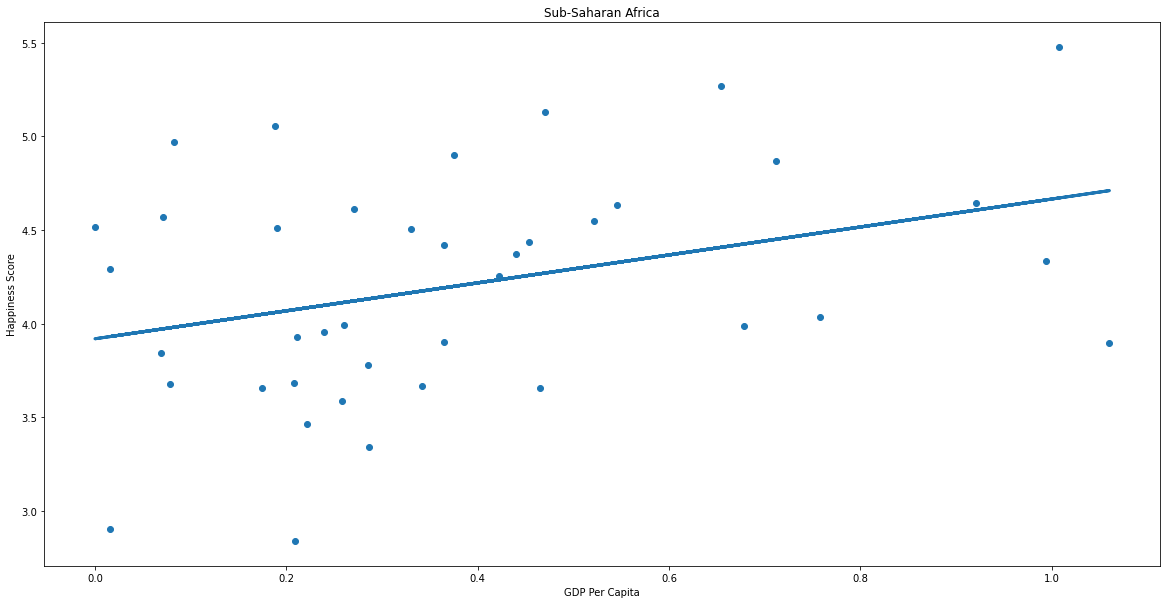

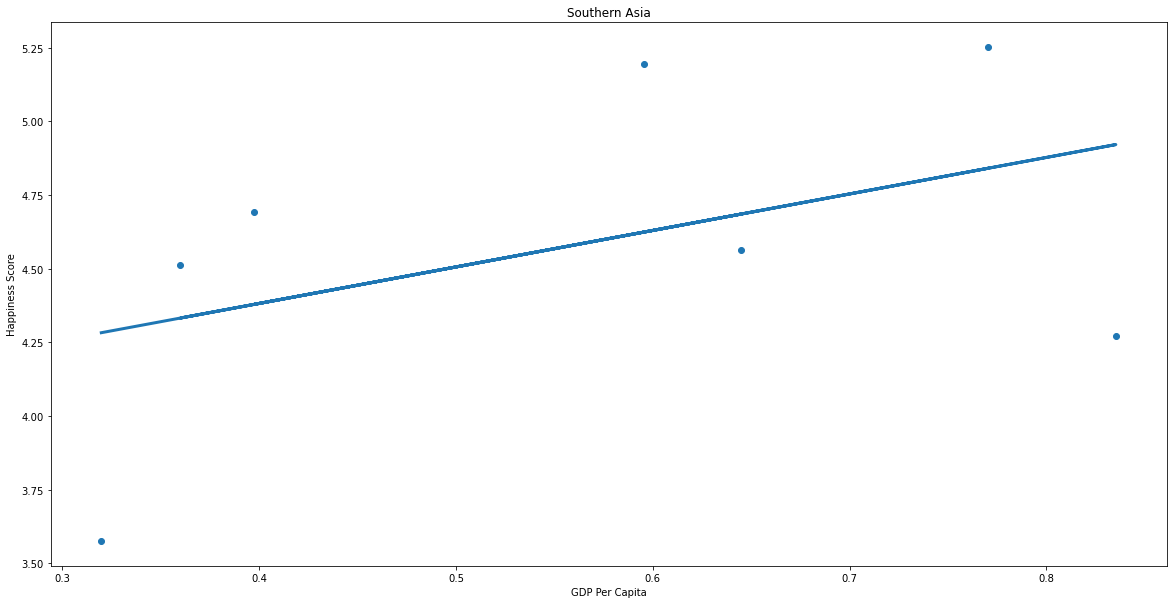

In [47]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()
regions = main_df['2015']['regional_indicator'].unique()

for region in regions:
    happiness = main_df['2015'][main_df['2015']['regional_indicator'] == region]['happiness_score']
    gdp = main_df['2015'][main_df['2015']['regional_indicator'] == region]['explained_by:_gdp_per_capita']
    happiness = happiness.values.reshape(-1, 1)
    gdp = gdp.values.reshape(-1,1)
    linreg.fit(gdp, happiness)
    regline_x = gdp
    regline_y = linreg.intercept_ + linreg.coef_ * gdp


    f = plt.figure(figsize=(20, 10))
    plt.scatter(gdp, happiness)
    plt.plot(regline_x, regline_y, linewidth = 3, label = region)
    plt.xlabel('GDP Per Capita');
    plt.ylabel('Happiness Score');
    plt.title(region)



    